<a href="https://colab.research.google.com/github/EmirhanAkkus/EmirhanAkkus/blob/main/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
cfrom google.colab import drive
import pandas as pd
import zipfile
import os

# Google Drive'ı bağlama
drive.mount('/content/drive')

# CSV dosyasının yolu
csv_file_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'

# CSV dosyasını okuma
df = pd.read_csv(csv_file_path)

# Veriyi kontrol etmek için ilk birkaç satırı yazdırma
print("CSV Verisi:")
print(df.head())

# ZIP dosyasının yolu
zip_file_path = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG.zip'
extract_folder = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/'

# ZIP dosyasını açma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("ZIP dosyası başarıyla çıkarıldı.")

# Çıkarılan dosyaların varlığını kontrol edelim
if os.path.exists(extract_folder):
    print(f"{extract_folder} klasörü başarıyla çıkarıldı.")
else:
    print(f"{extract_folder} klasörü çıkarılmadı.")

SyntaxError: invalid syntax (<ipython-input-14-94173311365c>, line 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
from PIL import Image
import os
import pandas as pd
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')
# CSV dosyasını okuma
csv_file_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # CSV dosyanızın doğru yolu
df = pd.read_csv(csv_file_path)

# Görsel dosya yollarını oluştur
extract_folder = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/'  # Görsellerin olduğu klasör
df['image_path'] = df['image_name'].apply(lambda x: os.path.join(extract_folder, f"{x}.jpg"))

# Preprocessed klasörü oluşturma
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed/'
if not os.path.exists(preprocessed_folder):
    os.makedirs(preprocessed_folder)

# Görselleri yeniden boyutlandırma ve kaydetme
for idx, row in df.iterrows():
    image_path = row['image_path']

    # Görselin var olup olmadığını kontrol et
    if os.path.exists(image_path):
        print(f"Görsel bulundu: {image_path}")

        # Görseli açma
        with Image.open(image_path) as img:
            original_size = img.size  # Orijinal boyut
            print(f"Orijinal boyut: {original_size} - {image_path}")

            # Görseli 1280x920 boyutlarında yeniden boyutlandırma
            resized_img = img.resize((1280, 920))

            # Yeni dosya adı oluşturma
            new_image_path = os.path.join(preprocessed_folder, f"{row['image_name']}.jpg")

            # Görseli kaydetme
            resized_img.save(new_image_path)

            # Yeni boyutu yazdırma
            resized_size = resized_img.size
            print(f"Yeni boyut: {resized_size} - {new_image_path}")

        print(f"{image_path} başarıyla kaydedildi!")
    else:
        print(f"{image_path} bulunamadı. Bu görsel, CSV dosyasındaki etiketle uyumsuz olabilir.")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Görsel bulundu: /content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9633789.jpg
Orijinal boyut: (6000, 4000) - /content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9633789.jpg
Yeni boyut: (1280, 920) - /content/drive/MyDrive/dataset_folder/preprocessed/ISIC_9633789.jpg
/content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9633789.jpg başarıyla kaydedildi!
Görsel bulundu: /content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9634018.jpg
Orijinal boyut: (6000, 4000) - /content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9634018.jpg
Yeni boyut: (1280, 920) - /content/drive/MyDrive/dataset_folder/preprocessed/ISIC_9634018.jpg
/content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9634018.jpg başarıyla kaydedildi!
Görsel bulundu: /content/drive/MyDrive/dataset_folder/ISIC_2020_Training_JPEG/train/ISIC_9634177.jpg
Orijinal boyut: 

In [ ]:
import os
import pandas as pd

# Dosya yolları
csv_path = "/content/drive/MyDrive/dataset_folder/filtered_dataset.csv"
preprocessed_folder = "/content/drive/MyDrive/dataset_folder/preprocessed/"

# CSV dosyasını oku
filtered_dataset = pd.read_csv(csv_path)

# Preprocessed klasöründeki görsellerin isimlerini al
preprocessed_files = set(os.listdir(preprocessed_folder))

# Etiketleri karşılaştırmak için bir liste
comparison_results = []

# Görselleri ve etiketlerini kontrol et
for _, row in filtered_dataset.iterrows():
    img_name = row['image_name'] + ".jpg"  # Preprocessed içinde .jpg var
    target = row['target']
    benign_malignant = row['benign_malignant']

    # Görselin preprocessed klasöründe olup olmadığını kontrol et
    if img_name in preprocessed_files:
        status = "Found in Preprocessed"
        label_match = "Match" if (target == 0 and benign_malignant == 'benign') or (target == 1 and benign_malignant == 'malignant') else "Mismatch"
    else:
        status = "Not Found in Preprocessed"
        label_match = "N/A"

    # Sonuçları listeye ekle
    comparison_results.append({
        "image_name": img_name,
        "target": target,
        "benign_malignant": benign_malignant,
        "status": status,
        "label_match": label_match
    })

# Karşılaştırma sonuçlarını CSV dosyasına kaydet
output_csv_path = "/content/drive/MyDrive/karşılaştırma.csv"
pd.DataFrame(comparison_results).to_csv(output_csv_path, index=False)

print(f"Karşılaştırma sonuçları {output_csv_path} dosyasına kaydedildi.")


Karşılaştırma sonuçları /content/drive/MyDrive/karşılaştırma.csv dosyasına kaydedildi.


In [ ]:
from google.colab import drive
import pandas as pd
import os

# Google Drive'ı bağla
drive.mount('/content/drive')

import os
import pandas as pd

# Dosya yolları
csv_path = "/content/drive/MyDrive/dataset_folder/filtered_dataset.csv"
preprocessed_folder = "/content/drive/MyDrive/dataset_folder/preprocessed/"

# CSV dosyasını oku
filtered_dataset = pd.read_csv(csv_path)

# Preprocessed klasöründeki görsellerin isimlerini alın
preprocessed_files = set(os.listdir(preprocessed_folder))

# Görselleri etiketlemek için liste
labeled_images = []

for _, row in filtered_dataset.iterrows():
    img_name = row['image_name'] + ".jpg"  # Preprocessed içinde .jpg var
    target = row['target']
    benign_malignant = row['benign_malignant']
    if img_name in preprocessed_files:
        labeled_images.append({
            "image_name": img_name,
            "target": target,
            "benign_malignant": benign_malignant,
            "status": "Found in Preprocessed"
        })
    else:
        labeled_images.append({
            "image_name": img_name,
            "target": target,
            "benign_malignant": benign_malignant,
            "status": "Not Found in Preprocessed"
        })

# Etiketlenen görselleri CSV dosyasına kaydet
output_csv_path = "/content/drive/MyDrive/labeled_images.csv"
pd.DataFrame(labeled_images).to_csv(output_csv_path, index=False)

print(f"Etiketli görseller {output_csv_path} dosyasına kaydedildi.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Etiketli görseller /content/drive/MyDrive/labeled_images.csv dosyasına kaydedildi.


In [ ]:
import pandas as pd

# Etiketli görsellerin bulunduğu CSV dosyasını oku
labeled_images_path = "/content/drive/MyDrive/labeled_images.csv"
labeled_images = pd.read_csv(labeled_images_path)

# İlk 50 görseli yazdır
first_50_images = labeled_images.head(50)

for _, row in first_50_images.iterrows():
    print(f"Görsel Adı: {row['image_name']}, Target: {row['target']}, Benign/Malignant: {row['benign_malignant']}")


Görsel Adı: ISIC_2637011.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0015719.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0052212.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0068279.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0074268.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0074311.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0074542.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0075663.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0075914.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0076262.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0076545.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0076742.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0076995.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0077472.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı: ISIC_0077735.jpg, Target: 0, Benign/Malignant: benign
Görsel Adı

In [ ]:
import os
import pandas as pd

# Preprocessed klasörünün yolu
preprocessed_folder = "/content/drive/MyDrive/dataset_folder/preprocessed/"

# filtered_dataset.csv'yi oku
filtered_dataset = pd.read_csv("/content/drive/MyDrive/dataset_folder/filtered_dataset.csv")

# Görselin mevcut olup olmadığını kontrol etmek için yeni bir kolon ekleyelim
filtered_dataset['image_exists'] = filtered_dataset['image_name'].apply(lambda x: os.path.exists(os.path.join(preprocessed_folder, f"{x}.jpg")))

# Görsellerin tam yolları ve etiketler
filtered_dataset['image_path'] = filtered_dataset['image_name'].apply(lambda x: os.path.join(preprocessed_folder, f"{x}.jpg"))

# İlk birkaç satırı kontrol edelim
print("Görsellerin Tam Yolları ve Etiketler:")
print(filtered_dataset[['image_path', 'target', 'benign_malignant']].head())

# Eksik görselleri bulalım
missing_files = filtered_dataset[~filtered_dataset['image_exists']]

# Eksik görsellerin sayısını yazdıralım
print(f"\nEksik görsel sayısı: {len(missing_files)}")

# Eğer eksik görsel varsa, listelerini yazdıralım
if len(missing_files) > 0:
    print("Eksik görseller listesi:")
    print(missing_files[['image_name', 'target', 'benign_malignant']])
else:
    print("Tüm görseller mevcut!")

# Tüm veriyi bir CSV dosyasına kaydedelim
output_csv_path = "/content/drive/MyDrive/dataset_folder/checked_images.csv"
filtered_dataset.to_csv(output_csv_path, index=False)

print(f"\nKontrol edilen veriler {output_csv_path} dosyasına kaydedildi.")


Görsellerin Tam Yolları ve Etiketler:
                                          image_path  target benign_malignant
0  /content/drive/MyDrive/dataset_folder/preproce...       0           benign
1  /content/drive/MyDrive/dataset_folder/preproce...       0           benign
2  /content/drive/MyDrive/dataset_folder/preproce...       0           benign
3  /content/drive/MyDrive/dataset_folder/preproce...       0           benign
4  /content/drive/MyDrive/dataset_folder/preproce...       0           benign

Eksik görsel sayısı: 0
Tüm görseller mevcut!

Kontrol edilen veriler /content/drive/MyDrive/dataset_folder/checked_images.csv dosyasına kaydedildi.


In [ ]:
import os
import pandas as pd

# Veri dosyanız
df = pd.read_csv("/content/drive/MyDrive/dataset_folder/filtered_dataset.csv")  # Etiketleri içeren CSV dosyasını okuyun

# Görsel dosyalarının bulunduğu yol
image_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Bu, görsellerin bulunduğu klasörün yolu

# Görsellerin mevcut olup olmadığını kontrol etme
df['image_exists'] = df['image_name'].apply(lambda x: os.path.exists(os.path.join(image_dir, f"{x}.jpg")))

# Görsel mevcut olmayanları kontrol etme
missing_images = df[df['image_exists'] == False]
print(f"Eksik Görsellerin Sayısı: {len(missing_images)}")

if len(missing_images) > 0:
    print("Eksik Görseller:")
    print(missing_images)

# Etiketlerin doğru olup olmadığını kontrol etme
print("İlk birkaç satırdaki etiketlere bakalım:")
print(df[['image_name', 'target', 'benign_malignant']].head())


Eksik Görsellerin Sayısı: 5839
Eksik Görseller:
                    image_name  target benign_malignant  image_exists
33126  ISIC_8231999_0_5785.jpg       1        malignant         False
33127  ISIC_8231999_0_7074.jpg       1        malignant         False
33128   ISIC_8231999_0_604.jpg       1        malignant         False
33129  ISIC_8231999_0_6869.jpg       1        malignant         False
33130  ISIC_8231999_0_2805.jpg       1        malignant         False
...                        ...     ...              ...           ...
38960  ISIC_1654342_0_8858.jpg       1        malignant         False
38961  ISIC_1654342_0_9447.jpg       1        malignant         False
38962  ISIC_1654342_0_1981.jpg       1        malignant         False
38963  ISIC_1654342_0_9900.jpg       1        malignant         False
38964  ISIC_1654342_0_4740.jpg       1        malignant         False

[5839 rows x 4 columns]
İlk birkaç satırdaki etiketlere bakalım:
     image_name  target benign_malignant
0  IS

In [ ]:
import os
import pandas as pd

# Veri dosyanız
df = pd.read_csv("/content/drive/MyDrive/dataset_folder/filtered_dataset.csv")  # Etiketleri içeren CSV dosyasını okuyun

# Görsel dosyalarının bulunduğu yol
image_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Bu, görsellerin bulunduğu klasörün yolu

# Preprocessed klasöründeki tüm görselleri listeleyin
preprocessed_images = set(os.listdir(image_dir))  # Görsellerin adıyla bir set oluşturuyoruz

# Görselin uzantısız adını kontrol etme
def check_image_exists(image_name):
    image_name = image_name.strip()  # İsimdeki boşlukları temizle
    # İlk kontrol: Orijinal görsel ismiyle (uzantısız)
    if f"{image_name}.jpg" in preprocessed_images:
        return True
    # İkinci kontrol: Augmented görsel ismiyle (uzantılı)
    elif f"{image_name}_0_5785.jpg" in preprocessed_images:  # Örneğin augmented görsel için kontrol
        return True
    return False

# Görsellerin mevcut olup olmadığını kontrol etme
df['image_exists'] = df['image_name'].apply(check_image_exists)

# Görsel mevcut olmayanları kontrol etme
missing_images = df[df['image_exists'] == False]
print(f"Eksik Görsellerin Sayısı: {len(missing_images)}")

if len(missing_images) > 0:
    print("Eksik Görseller:")
    print(missing_images[['image_name', 'target', 'benign_malignant']])  # Sadece ilgili kolonları yazdırıyoruz

# Etiketlerin doğru olup olmadığını kontrol etme
print("İlk birkaç satırdaki etiketlere bakalım:")
print(df[['image_name', 'target', 'benign_malignant']].head())


Eksik Görsellerin Sayısı: 5839
Eksik Görseller:
                    image_name  target benign_malignant
33126  ISIC_8231999_0_5785.jpg       1        malignant
33127  ISIC_8231999_0_7074.jpg       1        malignant
33128   ISIC_8231999_0_604.jpg       1        malignant
33129  ISIC_8231999_0_6869.jpg       1        malignant
33130  ISIC_8231999_0_2805.jpg       1        malignant
...                        ...     ...              ...
38960  ISIC_1654342_0_8858.jpg       1        malignant
38961  ISIC_1654342_0_9447.jpg       1        malignant
38962  ISIC_1654342_0_1981.jpg       1        malignant
38963  ISIC_1654342_0_9900.jpg       1        malignant
38964  ISIC_1654342_0_4740.jpg       1        malignant

[5839 rows x 3 columns]
İlk birkaç satırdaki etiketlere bakalım:
     image_name  target benign_malignant
0  ISIC_2637011       0           benign
1  ISIC_0015719       0           benign
2  ISIC_0052212       0           benign
3  ISIC_0068279       0           benign
4  ISIC_0

In [ ]:
import os
import pandas as pd

# Veri dosyanız
df = pd.read_csv("/content/drive/MyDrive/dataset_folder/filtered_dataset.csv")  # Etiketleri içeren CSV dosyasını okuyun

# Görsel dosyalarının bulunduğu yol
image_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Bu, görsellerin bulunduğu klasörün yolu

# Preprocessed klasöründeki tüm görselleri listeleyin
preprocessed_images = set(os.listdir(image_dir))  # Görsellerin adıyla bir set oluşturuyoruz

# Görselin orijinal adını kontrol etme
def check_augmented_images(image_name):
    image_name = image_name.strip()  # İsimdeki boşlukları temizle
    # Augmented görsel ismiyle kontrol et (orijinal isim + _0_XXXX.jpg)
    augmented_images = [f"{image_name}_{i}.jpg" for i in range(0, 10000)]  # 0'dan başlayarak tüm artırılmış dosyaları kontrol et
    for augmented_image in augmented_images:
        if augmented_image in preprocessed_images:
            return True
    return False

# Görsellerin mevcut olup olmadığını kontrol etme
df['image_exists'] = df['image_name'].apply(lambda x: check_augmented_images(x.replace('.jpg', '')))  # '.jpg' olmadan kontrol et

# Görsel mevcut olmayanları kontrol etme
missing_images = df[df['image_exists'] == False]
print(f"Eksik Görsellerin Sayısı: {len(missing_images)}")

if len(missing_images) > 0:
    print("Eksik Görseller:")
    print(missing_images[['image_name', 'target', 'benign_malignant']])  # Sadece ilgili kolonları yazdırıyoruz

# Etiketlerin doğru olup olmadığını kontrol etme
print("İlk birkaç satırdaki etiketlere bakalım:")
print(df[['image_name', 'target', 'benign_malignant']].head())


Eksik Görsellerin Sayısı: 38965
Eksik Görseller:
                    image_name  target benign_malignant
0                 ISIC_2637011       0           benign
1                 ISIC_0015719       0           benign
2                 ISIC_0052212       0           benign
3                 ISIC_0068279       0           benign
4                 ISIC_0074268       0           benign
...                        ...     ...              ...
38960  ISIC_1654342_0_8858.jpg       1        malignant
38961  ISIC_1654342_0_9447.jpg       1        malignant
38962  ISIC_1654342_0_1981.jpg       1        malignant
38963  ISIC_1654342_0_9900.jpg       1        malignant
38964  ISIC_1654342_0_4740.jpg       1        malignant

[38965 rows x 3 columns]
İlk birkaç satırdaki etiketlere bakalım:
     image_name  target benign_malignant
0  ISIC_2637011       0           benign
1  ISIC_0015719       0           benign
2  ISIC_0052212       0           benign
3  ISIC_0068279       0           benign
4  ISIC

In [ ]:
# Sınıfların dağılımı
class_distribution = df['benign_malignant'].value_counts()
print(f"Sınıfların Dağılımı:\n{class_distribution}")


NameError: name 'df' is not defined

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Etiketler (benign ve malignant sınıflarının etiketleri)
labels = df['benign_malignant'].values  # Burada df, CSV'nizi içeren DataFrame olmalı

# Sınıf ağırlıklarını hesaplayalım
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

# Sınıf ağırlıklarını sözlük formatında oluştur
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Sınıf Ağırlıkları: {class_weight_dict}")


NameError: name 'df' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(1280, 920, 3)):
    inputs = layers.Input(input_size)

    # Encoder kısmı
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    conv1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(conv1)
    pool1 = layers.MaxPooling2D((2, 2))(conv1)

    # Bottleneck kısmı
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(pool1)
    conv2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(conv2)

    # Decoder kısmı
    up1 = layers.UpSampling2D((2, 2))(conv2)
    up1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(up1)  # İki sınıf için sigmoid kullanıyoruz

    model = models.Model(inputs, output)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Modeli oluştur
model = unet_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1280, 920, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1280, 920, 64)       │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1280, 920, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 640, 460, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 640, 460, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 640, 460, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 1280, 920, 128)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 1280, 920, 64)       │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 1280, 920, 1)        │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 334,017 (1.27 MB)

 Trainable params: 334,017 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import pandas as pd
import os
from PIL import Image

# CSV dosyasını okuma
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # CSV dosyanızın yolu
df = pd.read_csv(csv_path)

# Preprocessed klasör yolu
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed/'

# İlk target = 1 olan satırı bulma
first_cancerous = df[df['target'] == 1].iloc[1555]  # kanserli örneği seçiyoruz
image_name = first_cancerous['image_name']
target = first_cancerous['target']

# Görsel yolunu oluşturma
image_path = os.path.join(preprocessed_folder, f"{image_name}.jpg")

# Görsel kontrolü ve bilgileri yazdırma
if os.path.exists(image_path):
    print(f"Görsel bulundu: {image_path}")
    print(f"Target Bilgisi: {target}")
    print("Kanser Durumu: Kanserli")

    # Görseli gösterme
    with Image.open(image_path) as img:
        img.show()  # Görüntüleme
else:
    print(f"Görsel bulunamadı: {image_name}")
    print(f"Target Bilgisi: {target}")
    print("Kanser Durumu: Kanserli")


Görsel bulunamadı: ISIC_9967383_0_5173.jpg
Target Bilgisi: 1
Kanser Durumu: Kanserli


In [ ]:
import pandas as pd
import os
from PIL import Image

# CSV dosyasını okuma
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # CSV dosyanızın yolu
df = pd.read_csv(csv_path)

# Preprocessed klasör yolu
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'

# İlk target = 1 olan satırı bulma
first_cancerous = df[df['target'] == 1].iloc[6155]  # kanserli örneği seçiyoruz
image_name = first_cancerous['image_name']
target = first_cancerous['target']

# Görsel yolunu oluşturma (uzantıyı kontrol etme)
image_path = os.path.join(preprocessed_folder, image_name)  # Uzantı CSV'den geliyorsa, zaten eklenmiş olabilir

# Görsel yolunu yazdır
print(f"Aranan Görsel Yolu: {image_path}")

# Görsel kontrolü ve bilgileri yazdırma
if os.path.exists(image_path):
    print(f"Görsel bulundu: {image_path}")
    print(f"Target Bilgisi: {target}")
    print("Kanser Durumu: Kanserli")

    # Görseli gösterme
    with Image.open(image_path) as img:
        img.show()  # Görüntüleme
else:
    print(f"Görsel bulunamadı: {image_name}")
    print(f"Target Bilgisi: {target}")
    print("Kanser Durumu: Kanserli")


Aranan Görsel Yolu: /content/drive/MyDrive/dataset_folder/preprocessed/ISIC_1177505_0_8430.jpg
Görsel bulundu: /content/drive/MyDrive/dataset_folder/preprocessed/ISIC_1177505_0_8430.jpg
Target Bilgisi: 1
Kanser Durumu: Kanserli


In [ ]:
import zipfile
import os
from google.colab import drive
drive.mount('/content/drive')

# ZIP dosyasının ve çıkarılacağı klasörün yolları
zip_file_path = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Test_JPEG.zip'
test_extracted_folder = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Test_Extracted'

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(test_extracted_folder)

print(f"Test ZIP dosyası {test_extracted_folder} klasörüne başarıyla çıkarıldı.")


Mounted at /content/drive
Test ZIP dosyası /content/drive/MyDrive/dataset_folder/ISIC_2020_Test_Extracted klasörüne başarıyla çıkarıldı.


In [ ]:
import os
from PIL import Image

# Test verilerinin olduğu alt klasör ve hedef klasör
test_folder = '/content/drive/MyDrive/dataset_folder/ISIC_2020_Test_Extracted/ISIC_2020_Test_Input'
preprocessed_test_folder = '/content/drive/MyDrive/dataset_folder/preprocessed_test'

# Preprocessed klasörünü oluştur (yoksa)
os.makedirs(preprocessed_test_folder, exist_ok=True)

# Görselleri yeniden boyutlandırma ve kaydetme işlemi
for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)  # Orijinal dosyanın tam yolu
    save_path = os.path.join(preprocessed_test_folder, img_name)  # Kaydedilecek dosyanın tam yolu

    # Sadece dosyalar üzerinde işlem yap
    if os.path.isfile(img_path):
        try:
            # Görseli aç ve yeniden boyutlandır
            with Image.open(img_path) as img:
                resized_img = img.resize((1280, 920))  # 1280x920 boyutuna getir
                resized_img.save(save_path)  # Kaydet
            print(f"{img_name} başarıyla yeniden boyutlandırıldı ve kaydedildi.")
        except Exception as e:
            print(f"{img_name} işlenemedi. Hata: {e}")
    else:
        print(f"{img_name} bir klasör olduğu için atlandı.")

print(f"Tüm test görselleri {preprocessed_test_folder} klasörüne başarıyla kaydedildi.")

Görüntülenen çıkış son 5000 satıra kısaltıldı.
ISIC_6690278.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_1392557.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_5467877.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_0665521.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_9802201.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_5664143.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_4341449.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_5774209.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_2265045.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_2939559.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_5128951.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_7546864.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_3197746.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_6397215.jpg başarıyla yeniden boyutlandırıldı ve kaydedildi.
ISIC_7665759.jpg başarıyla ye

In [ ]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive


drive.mount('/content/drive')
# Görsellerin bulunduğu ana klasör
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
malignant_augmented_folder = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'

# CSV dosyasını yükleyin
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
df = pd.read_csv(csv_path)

# Kanserli (malignant) görselleri filtreleyin
malignant_images = df[df['benign_malignant'] == 'malignant']['image_name'].tolist()

# Augmented klasörünü oluştur
os.makedirs(malignant_augmented_folder, exist_ok=True)

# Veri artırma için ayarları tanımlayın
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Kanserli görseller üzerinde augmentation işlemi
for img_name in malignant_images:
    img_path = os.path.join(preprocessed_folder, f"{img_name}.jpg")
    try:
        with Image.open(img_path) as img:
            img_array = np.array(img)
            img_array = img_array.reshape((1,) + img_array.shape)  # Batch boyutunu ekle

            count = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=malignant_augmented_folder,
                                      save_prefix=img_name, save_format='jpg'):
                count += 1
                if count >= 10:
                    break
        print(f"{img_name} için augmentation işlemi tamamlandı.")
    except Exception as e:
        print(f"{img_name} işlenemedi. Hata: {e}")

print(f"Tüm augmentation işlemleri {malignant_augmented_folder} klasörüne kaydedildi.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ISIC_0149568 için augmentation işlemi tamamlandı.
ISIC_0188432 için augmentation işlemi tamamlandı.
ISIC_0207268 için augmentation işlemi tamamlandı.
ISIC_0232101 için augmentation işlemi tamamlandı.
ISIC_0247330 için augmentation işlemi tamamlandı.
ISIC_0250839 için augmentation işlemi tamamlandı.
ISIC_0272509 için augmentation işlemi tamamlandı.
ISIC_0273046 için augmentation işlemi tamamlandı.
ISIC_0274382 için augmentation işlemi tamamlandı.
ISIC_0275828 için augmentation işlemi tamamlandı.
ISIC_0280912 için augmentation işlemi tamamlandı.
ISIC_0286360 için augmentation işlemi tamamlandı.
ISIC_0327406 için augmentation işlemi tamamlandı.
ISIC_0333091 için augmentation işlemi tamamlandı.
ISIC_0337631 için augmentation işlemi tamamlandı.
ISIC_0351666 için augmentation işlemi tamamlandı.
ISIC_0369831 için augmentation işlemi tamamlandı.
ISIC_0489267 için aug

In [ ]:
import os

augmented_files = os.listdir(malignant_augmented_folder)
print(f"Oluşturulan görsel sayısı: {len(augmented_files)}")
print("Örnek görseller:")
print(augmented_files[:10])  # İlk 10 görseli listele


Oluşturulan görsel sayısı: 5839
Örnek görseller:
['ISIC_0149568_0_5751.jpg', 'ISIC_0149568_0_7370.jpg', 'ISIC_0149568_0_7118.jpg', 'ISIC_0149568_0_9458.jpg', 'ISIC_0149568_0_4810.jpg', 'ISIC_0149568_0_7484.jpg', 'ISIC_0149568_0_8036.jpg', 'ISIC_0149568_0_3974.jpg', 'ISIC_0149568_0_7720.jpg', 'ISIC_0149568_0_1496.jpg']


In [ ]:
print(f"Oluşturulan görsel sayısı: {len(os.listdir(malignant_augmented_folder))}")


Oluşturulan görsel sayısı: 5839


In [ ]:
import pandas as pd
import os
from google.colab import drive


drive.mount('/content/drive')
# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # Mevcut CSV
augmented_dir = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'  # Yeni augmented görseller
output_csv_path = '/content/drive/MyDrive/dataset_folder/updated_dataset.csv'  # Yeni CSV dosyası

# 1. Mevcut CSV'yi yükle
df = pd.read_csv(csv_path)

# 2. Yeni augmented görselleri listele ve etiketle
augmented_files = os.listdir(augmented_dir)
augmented_data = []

for file_name in augmented_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Bu görseller "malignant" sınıfına ait
        augmented_data.append({'filename': file_name, 'label': 'malignant'})

# 3. Yeni veriyi DataFrame'e dönüştür
augmented_df = pd.DataFrame(augmented_data)

# 4. Orijinal CSV ile birleştir
updated_df = pd.concat([df, augmented_df], ignore_index=True)

# 5. Yeni CSV'yi kaydet
updated_df.to_csv(output_csv_path, index=False)

print(f"Yeni CSV dosyası kaydedildi: {output_csv_path}")
print(f"Toplam görsel sayısı: {len(updated_df)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Yeni CSV dosyası kaydedildi: /content/drive/MyDrive/dataset_folder/updated_dataset.csv
Toplam görsel sayısı: 38965


In [ ]:
import pandas as pd
import os
from google.colab import drive


drive.mount('/content/drive')
# Yollar
csv_path = '/content/drive/MyDrive//dataset_folder/filtered_dataset.csv'  # Mevcut CSV dosyası
augmented_dir = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'  # Augmented görseller klasörü
output_csv_path = '/content/drive/MyDrive//dataset_folder/updated_dataset.csv'  # Güncellenmiş CSV dosyası

# 1. Mevcut CSV'yi yükle
df = pd.read_csv(csv_path)

# 2. Yeni augmented görselleri listele ve uygun formatta etiketle
augmented_files = os.listdir(augmented_dir)
augmented_data = []

for file_name in augmented_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        augmented_data.append({
            'image_name': file_name,        # Görsel adı
            'target': 1,                   # Tüm augmented görseller "malignant" (1)
            'benign_malignant': 'malignant'  # Kötü huylu olarak etiketle
        })

# 3. Augmented veriyi DataFrame'e dönüştür
augmented_df = pd.DataFrame(augmented_data)

# 4. Orijinal CSV ile augmented CSV'yi birleştir
updated_df = pd.concat([df, augmented_df], ignore_index=True)

# 5. Güncellenmiş CSV'yi kaydet
updated_df.to_csv(output_csv_path, index=False)

print(f"Yeni augmented veriler mevcut dataset ile birleştirildi ve kaydedildi: {output_csv_path}")
print(f"Toplam görsel sayısı: {len(updated_df)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Yeni augmented veriler mevcut dataset ile birleştirildi ve kaydedildi: /content/drive/MyDrive//dataset_folder/updated_dataset.csv
Toplam görsel sayısı: 38965


In [ ]:
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Güncellenmiş CSV dosyasını yükle
updated_csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
updated_df = pd.read_csv(filtered_csv_path)

# Sınıf dağılımını kontrol et
print("Güncellenmiş sınıf dağılımı:")
print(updated_df['benign_malignant'].value_counts())

# Sınıf ağırlıklarını hesaplamak için target değerlerini kullanıyoruz
labels = updated_df['target'].values  # 0 (benign) ve 1 (malignant)

# Sınıf ağırlıklarını hesapla
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Sınıf ağırlıklarını bir sözlük olarak göster
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}

print("\nGüncellenmiş sınıf ağırlıkları:")
print(class_weight_dict)



Güncellenmiş sınıf dağılımı:
benign_malignant
benign       32542
malignant     6423
Name: count, dtype: int64

Güncellenmiş sınıf ağırlıkları:
{0: 0.598687849548276, 1: 3.0332399190409465}


In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Etiketler (benign ve malignant sınıflarının etiketleri)
labels = df['benign_malignant'].values  # Burada df, CSV'nizi içeren DataFrame olmalı

# Sınıf ağırlıklarını hesaplayalım
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)

# Sınıf ağırlıklarını sözlük formatında oluştur
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

print(f"Sınıf Ağırlıkları: {class_weight_dict}")

Sınıf Ağırlıkları: {0: 0.598687849548276, 1: 3.0332399190409465}


In [ ]:
filtered_csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
df = pd.read_csv(filtered_csv_path)
print(df.head())  # Doğru CSV yüklendi mi kontrol edin


     image_name  target benign_malignant
0  ISIC_2637011       0           benign
1  ISIC_0015719       0           benign
2  ISIC_0052212       0           benign
3  ISIC_0068279       0           benign
4  ISIC_0074268       0           benign


In [ ]:
import pandas as pd
import os
from google.colab import drive

drive.mount('/content/drive')

# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # Mevcut CSV dosyası
augmented_dir = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'  # Augmented görseller klasörü

# 1. Mevcut CSV'yi yükle
df = pd.read_csv(csv_path)

# 2. Yeni augmented görselleri listele ve uygun formatta etiketle
augmented_files = os.listdir(augmented_dir)
augmented_data = []

for file_name in augmented_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        augmented_data.append({
            'image_name': file_name,        # Görsel adı
            'target': 1,                    # Tüm augmented görseller "malignant" (1)
            'benign_malignant': 'malignant'  # Kötü huylu olarak etiketle
        })

# 3. Augmented veriyi DataFrame'e dönüştür
augmented_df = pd.DataFrame(augmented_data)

# 4. Augmented veriyi mevcut CSV'ye ekle
df = pd.concat([df, augmented_df], ignore_index=True)

# 5. Mevcut CSV'yi güncelle
df.to_csv(csv_path, index=False)

print(f"Augmented veriler mevcut dataset ile birleştirildi ve CSV dosyası güncellendi: {csv_path}")
print(f"Toplam görsel sayısı: {len(df)}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Augmented veriler mevcut dataset ile birleştirildi ve CSV dosyası güncellendi: /content/drive/MyDrive/dataset_folder/filtered_dataset.csv
Toplam görsel sayısı: 38965


In [ ]:
import pandas as pd

# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # Güncellenmiş CSV dosyasının yolu

# 1. CSV dosyasını yükle
df = pd.read_csv(csv_path)

# 2. Augmentasyonlu görsellerin listesi
augmented_files = df[df['benign_malignant'] == 'malignant']

# 3. Augmentasyonlu görsellerin etiketlerini kontrol et
incorrect_labels = augmented_files[augmented_files['target'] != 1]

# 4. Hatalı etiketleri yazdır
if not incorrect_labels.empty:
    print("Hatalı etiketler tespit edildi:")
    print(incorrect_labels[['image_name', 'target', 'benign_malignant']])
else:
    print("Tüm augmented görseller doğru etiketlendi.")


Tüm augmented görseller doğru etiketlendi.


In [ ]:
import os
import shutil
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

# Yollar
preprocessed_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Preprocessed klasörü
augmented_dir = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'  # Augmented görseller klasörü

# 1. Augmented görselleri listele
augmented_files = os.listdir(augmented_dir)

# 2. Augmented görselleri taşımak
for file_name in augmented_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Görselin eski yolunu ve yeni yolunu belirleyelim
        old_image_path = os.path.join(augmented_dir, file_name)
        new_image_path = os.path.join(preprocessed_dir, file_name)

        # Görseli preprocessed klasörüne taşıyalım
        shutil.move(old_image_path, new_image_path)

print(f"{len(augmented_files)} adet augmented görsel preprocessed klasörüne taşındı.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5839 adet augmented görsel preprocessed klasörüne taşındı.


In [ ]:
import pandas as pd
import os

# CSV dosyasının yolu
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
# Preprocessed klasörünün yolu
preprocessed_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'

# 1. Mevcut CSV dosyasını yükleyelim
df = pd.read_csv(csv_path)

# 2. Preprocessed klasöründeki tüm görselleri listeleyelim
preprocessed_files = os.listdir(preprocessed_dir)

# 3. Görsellerin etiketlerini CSV'ye eklemek için bir döngü başlatalım
for file_name in preprocessed_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Görsel adıyla CSV dosyasındaki ilgili satırı bulalım
        image_name_without_ext = file_name  # Görsel adı
        image_data = df[df['image_name'] == image_name_without_ext]

        if not image_data.empty:
            # Görselin etiketini alalım
            target = image_data['target'].values[0]
            benign_malignant = image_data['benign_malignant'].values[0]

            # Görseli doğru etiketle
            print(f"Görsel: {file_name} - Target: {target} - Kanser Durumu: {benign_malignant}")
        else:
            print(f"Görsel için etiket bulunamadı: {file_name}")

# Eğer CSV'yi güncellemek isterseniz, aşağıdaki satırı ekleyebilirsiniz.
# df.to_csv(csv_path, index=False)


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Görsel: ISIC_9626843_0_2930.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_7619.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_9581.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_2785.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_7529.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_4847.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_3863.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_9322.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_4536.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_463.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9677503_0_4990.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9685931_0_7153.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9685931_0_6343.jpg - Target: 1 - Kanser Durumu: malignant
Görsel: ISIC_9685931_0_6635.jpg

In [ ]:
import pandas as pd
import os

# CSV dosyasının yolu
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
# Preprocessed klasörünün yolu
preprocessed_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'

# 1. Mevcut CSV dosyasını yükleyelim
df = pd.read_csv(csv_path)

# 2. Preprocessed klasöründeki tüm görselleri listeleyelim
preprocessed_files = os.listdir(preprocessed_dir)

# 3. Görsellerin etiketlerini CSV ile kontrol edelim
for file_name in preprocessed_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Dosya ismini CSV'deki formatla karşılaştırırken uzantıyı dikkate alalım
        image_name_without_ext = os.path.splitext(file_name)[0]  # Uzantıyı çıkartalım
        image_data = df[df['image_name'] == image_name_without_ext]

        if not image_data.empty:
            # Görselin etiketini alalım
            target = image_data['target'].values[0]
            benign_malignant = image_data['benign_malignant'].values[0]

            # Görselin etiketini formatlı bir şekilde yazdıralım
            print(f"---------------------------\n"
                  f"Görsel Adı: {file_name}\n"
                  f"Etiket: {benign_malignant}\n"
                  f"Target Değeri: {target}\n"
                  f"---------------------------")
        else:
            print(f"Görsel için etiket bulunamadı: {file_name}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
Görsel için etiket bulunamadı: ISIC_9626843_0_2930.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_7619.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_9581.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_2785.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_7529.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_4847.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_3863.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_9322.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_4536.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_463.jpg
Görsel için etiket bulunamadı: ISIC_9677503_0_4990.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_7153.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_6343.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_6635.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_8595.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_2235.jpg
Görsel için etiket bulunamadı: ISIC_9685931_0_6915.jpg
Görsel için etiket 

In [ ]:
import pandas as pd
import os

# CSV dosyasının yolu
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
# Preprocessed klasörünün yolu
preprocessed_dir = '/content/drive/MyDrive/dataset_folder/preprocessed'

# 1. Mevcut CSV dosyasını yükleyelim
df = pd.read_csv(csv_path)

# 2. Preprocessed klasöründeki tüm görselleri listeleyelim
preprocessed_files = os.listdir(preprocessed_dir)

# 3. Görsellerin etiketlerini CSV ile kontrol edelim
for file_name in preprocessed_files:
    if file_name.endswith('.jpg') or file_name.endswith('.png'):
        # Dosya ismini CSV'deki formatla karşılaştırırken augmented görsellerin son kısmını yok sayalım
        image_name_without_ext = os.path.splitext(file_name)[0]  # Uzantıyı çıkartalım
        # Augmented görsellerdeki "_0_XXXXX" kısmını çıkaralım
        base_image_name = image_name_without_ext.split('_')[0] + '_' + image_name_without_ext.split('_')[1]

        # CSV'deki etiketle eşleşme kontrolü
        image_data = df[df['image_name'] == base_image_name]

        if not image_data.empty:
            # Görselin etiketini alalım
            target = image_data['target'].values[0]
            benign_malignant = image_data['benign_malignant'].values[0]

            # Görselin etiketini formatlı bir şekilde yazdıralım
            print(f"---------------------------\n"
                  f"Görsel Adı: {file_name}\n"
                  f"Etiket: {benign_malignant}\n"
                  f"Target Değeri: {target}\n"
                  f"---------------------------")
        else:
            print(f"Görsel için etiket bulunamadı: {file_name}")


Görüntülenen çıkış son 5000 satıra kısaltıldı.
---------------------------
Görsel Adı: ISIC_2975580_0_5021.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2975580_0_7651.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_4437.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_9300.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_9472.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_4576.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_4898.jpg
Etiket: malignant
Target Değeri: 1
---------------------------
---------------------------
Görsel Adı: ISIC_2979268_0_5996.jpg


In [ ]:
import pandas as pd
import os

# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # Mevcut CSV
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Görsellerin bulunduğu klasör
output_csv_path = '/content/drive/MyDrive/dataset_folder/final_dataset.csv'  # Çıkış CSV

# 1. Mevcut CSV dosyasını yükle
df = pd.read_csv(csv_path)

# 2. Preprocessed klasöründeki tüm görselleri listele
chunk_size = 1000  # Her seferde işlenecek dosya sayısı
preprocessed_files = os.listdir(preprocessed_folder)
total_files = len(preprocessed_files)
print(f"Preprocessed klasöründe toplam {total_files} dosya bulundu.")

# 3. Görselleri parça parça işleme
final_data = []

for i in range(0, total_files, chunk_size):
    print(f"{i} ile {min(i + chunk_size, total_files)} arasındaki dosyalar işleniyor...")
    chunk_files = preprocessed_files[i:i + chunk_size]

    for _, row in df.iterrows():
        img_name = row['image_name'] + ".jpg"  # CSV'deki görsel isimlerine '.jpg' ekle
        target = row['target']
        benign_malignant = row['benign_malignant']

        # Görselin preprocessed klasöründe olup olmadığını kontrol et
        status = "Found" if img_name in chunk_files else "Not Found"

        final_data.append({
            'image_name': img_name,
            'target': target,
            'benign_malignant': benign_malignant,
            'status': status
        })

    # Preprocessed klasöründe olup CSV'de olmayan augmented görselleri ekle
    for file_name in chunk_files:
        if not df['image_name'].str.contains(file_name.replace(".jpg", "")).any():
            final_data.append({
                'image_name': file_name,
                'target': 1,  # Augmented görseller malignant olduğu için 1
                'benign_malignant': 'malignant',
                'status': "Found"
            })

# 4. Final CSV oluştur
final_df = pd.DataFrame(final_data)

# 5. Yeni CSV dosyasını kaydet
final_df.to_csv(output_csv_path, index=False)

print(f"Final dataset oluşturuldu ve kaydedildi: {output_csv_path}")
print(f"Toplam görsel sayısı: {len(final_df)}")

# Eksik görsellerin sayısını yazdır
missing_images = final_df[final_df['status'] == "Not Found"]
print(f"Eksik görsel sayısı: {len(missing_images)}")
if len(missing_images) > 0:
    print("Eksik görseller:")
    print(missing_images)


Preprocessed klasöründe toplam 38966 dosya bulundu.
0 ile 1000 arasındaki dosyalar işleniyor...
1000 ile 2000 arasındaki dosyalar işleniyor...
2000 ile 3000 arasındaki dosyalar işleniyor...
3000 ile 4000 arasındaki dosyalar işleniyor...
4000 ile 5000 arasındaki dosyalar işleniyor...
5000 ile 6000 arasındaki dosyalar işleniyor...
6000 ile 7000 arasındaki dosyalar işleniyor...
7000 ile 8000 arasındaki dosyalar işleniyor...
8000 ile 9000 arasındaki dosyalar işleniyor...
9000 ile 10000 arasındaki dosyalar işleniyor...
10000 ile 11000 arasındaki dosyalar işleniyor...
11000 ile 12000 arasındaki dosyalar işleniyor...
12000 ile 13000 arasındaki dosyalar işleniyor...
13000 ile 14000 arasındaki dosyalar işleniyor...
14000 ile 15000 arasındaki dosyalar işleniyor...
15000 ile 16000 arasındaki dosyalar işleniyor...
16000 ile 17000 arasındaki dosyalar işleniyor...
17000 ile 18000 arasındaki dosyalar işleniyor...
18000 ile 19000 arasındaki dosyalar işleniyor...
19000 ile 20000 arasındaki dosyalar işl

In [ ]:
from google.colab import drive
import pandas as pd
import os
import shutil

# 1. Google Drive'ı bağla
drive.mount('/content/drive')

# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'  # Mevcut CSV
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'  # Tüm görsellerin bulunduğu klasör
output_csv_path = '/content/drive/MyDrive/dataset_folder/final_dataset.csv'  # Çıkış CSV
augmented_dir = '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'  # Augmented görseller klasörü


# 2. Preprocessed klasörünün varlığını kontrol et
if not os.path.exists(preprocessed_folder):
    print(f"Hata: '{preprocessed_folder}' klasörü bulunamadı. Lütfen yolu kontrol edin.")
else:
    # 3. Mevcut CSV dosyasını yükle
    df = pd.read_csv(csv_path)

    # 4. Augmented görselleri preprocessed klasörüne taşı
    # (Bu adım daha önce yapıldıysa, yorum satırı haline getirilebilir.)
    augmented_files = os.listdir(augmented_dir)
    for file_name in augmented_files:
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            old_image_path = os.path.join(augmented_dir, file_name)
            new_image_path = os.path.join(preprocessed_folder, file_name)
            shutil.move(old_image_path, new_image_path)
    print(f"{len(augmented_files)} adet augmented görsel preprocessed klasörüne taşındı.")

    # 5. Preprocessed klasöründeki tüm görselleri listele
    preprocessed_files = os.listdir(preprocessed_folder)

    # 6. Görselleri etiketleme ve kontrol etme
    final_data = []
    for _, row in df.iterrows():
        img_name = row['image_name'] + ".jpg"  # CSV'deki görsel isimlerine '.jpg' ekleyerek dosya adı oluştur
        target = row['target']
        benign_malignant = row['benign_malignant']

        # Görselin preprocessed klasöründe olup olmadığını kontrol et
        status = "Found" if img_name in preprocessed_files else "Not Found"

        final_data.append({
            'image_name': img_name,
            'target': target,
            'benign_malignant': benign_malignant,
            'status': status
        })

    # 7. Preprocessed klasöründeki ek görselleri (augment edilen) kontrol et
    for file_name in preprocessed_files:
        # Eğer görsel CSV'de bulunmuyorsa
        if not df['image_name'].str.contains(file_name.replace(".jpg", "")).any():
            final_data.append({
                'image_name': file_name,
                'target': 1,  # Augmented görseller malignant olduğu için 1
                'benign_malignant': 'malignant',
                'status': "Found"
            })

    # 8. Final CSV oluştur
    final_df = pd.DataFrame(final_data)

    # 9. Yeni CSV dosyasını kaydet
    final_df.to_csv(output_csv_path, index=False)

    print(f"Final dataset oluşturuldu ve kaydedildi: {output_csv_path}")
    print(f"Toplam görsel sayısı: {len(final_df)}")

    # 10. Eksik görsellerin sayısını yazdır
    missing_images = final_df[final_df['status'] == "Not Found"]
    print(f"Eksik görsel sayısı: {len(missing_images)}")
    if len(missing_images) > 0:
        print("Eksik görseller:")
        print(missing_images)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0 adet augmented görsel preprocessed klasörüne taşındı.
Final dataset oluşturuldu ve kaydedildi: /content/drive/MyDrive/dataset_folder/final_dataset.csv
Toplam görsel sayısı: 38966
Eksik görsel sayısı: 5839
Eksik görseller:
                        image_name  target benign_malignant     status
33126  ISIC_8231999_0_5785.jpg.jpg       1        malignant  Not Found
33127  ISIC_8231999_0_7074.jpg.jpg       1        malignant  Not Found
33128   ISIC_8231999_0_604.jpg.jpg       1        malignant  Not Found
33129  ISIC_8231999_0_6869.jpg.jpg       1        malignant  Not Found
33130  ISIC_8231999_0_2805.jpg.jpg       1        malignant  Not Found
...                            ...     ...              ...        ...
38960  ISIC_1654342_0_8858.jpg.jpg       1        malignant  Not Found
38961  ISIC_1654342_0_9447.jpg.jpg       1        malignant  Not Found
38962  I

In [ ]:
import pandas as pd
import os

# Yollar
csv_path = '/content/drive/MyDrive/dataset_folder/updated_filtered_dataset.csv'
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
output_csv_path = '/content/drive/MyDrive/dataset_folder/final_dataset.csv'

# 1. CSV dosyasını yükle
df = pd.read_csv(csv_path)

# 2. Preprocessed klasöründeki dosyaları listele
preprocessed_files = os.listdir(preprocessed_folder)

# 3. Fazladan '.jpg.jpg' uzantısını temizle
df['image_name'] = df['image_name'].str.replace('.jpg.jpg', '.jpg', regex=False)

# 4. Görselleri etiketleme ve kontrol
final_data = []
for _, row in df.iterrows():
    img_name = row['image_name'] + ".jpg"
    target = row['target']
    benign_malignant = row['benign_malignant']

    # Görsel preprocessed klasöründe mi?
    status = "Found" if img_name in preprocessed_files else "Not Found"

    final_data.append({
        'image_name': img_name,
        'target': target,
        'benign_malignant': benign_malignant,
        'status': status
    })

# 5. Preprocessed klasöründeki ek görselleri kontrol et
for file_name in preprocessed_files:
    if not df['image_name'].str.contains(file_name.replace('.jpg', '')).any():
        final_data.append({
            'image_name': file_name,
            'target': 1,
            'benign_malignant': 'malignant',
            'status': "Found"
        })

# 6. Final CSV oluştur ve kaydet
final_df = pd.DataFrame(final_data)
final_df.to_csv(output_csv_path, index=False)

print(f"Final dataset oluşturuldu ve kaydedildi: {output_csv_path}")
print(f"Toplam görsel sayısı: {len(final_df)}")

# Eksik görselleri kontrol et
missing_images = final_df[final_df['status'] == "Not Found"]
print(f"Eksik görsel sayısı: {len(missing_images)}")
if len(missing_images) > 0:
    print("Eksik görseller:")
    print(missing_images)


In [ ]:
# Eksik görsellerin listesindeki isimleri düzelt
final_df['image_name'] = final_df['image_name'].str.replace('.jpg.jpg', '.jpg', regex=False)


In [ ]:
# İsimler düzeltildikten sonra tekrar kontrol
final_df['status'] = final_df['image_name'].apply(
    lambda x: "Found" if x in preprocessed_files else "Not Found"
)


In [ ]:
missing_images = final_df[final_df['status'] == "Not Found"]
print(f"Yeni eksik görsel sayısı: {len(missing_images)}")
if len(missing_images) > 0:
    print("Eksik görseller:")
    print(missing_images)


Yeni eksik görsel sayısı: 0


In [ ]:
import pandas as pd
from google.colab import drive


# 1. Google Drive'ı bağla
drive.mount('/content/drive')
# CSV dosyasının yolu
csv_path = '/content/drive/MyDrive/dataset_folder/filtered_dataset.csv'
output_path = '/content/drive/MyDrive/dataset_folder/updated_filtered_dataset.csv'

# CSV dosyasını yükle
df = pd.read_csv(csv_path)

# Son 5839 satırı seç ve '.jpg' uzantısını kaldır
df.iloc[-5839:, df.columns.get_loc('image_name')] = df.iloc[-5839:]['image_name'].str.replace('.jpg', '', regex=False)

# Güncellenmiş dataset'i yeni bir CSV dosyasına kaydet
df.to_csv(output_path, index=False)

print(f"Güncellenmiş CSV dosyası kaydedildi: {output_path}")


Mounted at /content/drive
Güncellenmiş CSV dosyası kaydedildi: /content/drive/MyDrive/dataset_folder/updated_filtered_dataset.csv


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from google.colab import drive


# 1. Google Drive'ı bağla
drive.mount('/content/drive')
# Final dataset yolunu belirle
csv_path = '/content/drive/MyDrive/dataset_folder/final_dataset.csv'

# Veri setini yükle
df = pd.read_csv(csv_path)

# Eğitim ve test olarak böl (%80 eğitim, %20 test)
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['benign_malignant'], random_state=42)

# Bölünmüş datasetleri kaydet
train_df.to_csv('/content/drive/MyDrive/dataset_folder/train_dataset.csv', index=False)
test_df.to_csv('/content/drive/MyDrive/dataset_folder/test_dataset.csv', index=False)

print(f"Eğitim verisi boyutu: {len(train_df)}")
print(f"Test verisi boyutu: {len(test_df)}")


Mounted at /content/drive
Eğitim verisi boyutu: 31172
Test verisi boyutu: 7794


In [ ]:
# Eğitim veri setinin ilk birkaç satırını yazdır
print("Eğitim Verisi:")
print(train_df.head())

# Test veri setinin ilk birkaç satırını yazdır
print("Test Verisi:")
print(test_df.head())


Eğitim Verisi:
             image_name  target benign_malignant status
7802   ISIC_2432058.jpg       0           benign  Found
5379   ISIC_1707420.jpg       0           benign  Found
13665  ISIC_4191011.jpg       0           benign  Found
2646   ISIC_0892453.jpg       0           benign  Found
1276   ISIC_0485881.jpg       0           benign  Found
Test Verisi:
             image_name  target benign_malignant status
16769  ISIC_5130786.jpg       0           benign  Found
24384  ISIC_7400458.jpg       0           benign  Found
4853   ISIC_1559422.jpg       0           benign  Found
24304  ISIC_7376684.jpg       0           benign  Found
11536  ISIC_3557376.jpg       0           benign  Found


In [ ]:
# Eğitim verisi sınıf dağılımı
print("Eğitim Verisi Sınıf Dağılımı:")
print(train_df['benign_malignant'].value_counts())

# Test verisi sınıf dağılımı
print("Test Verisi Sınıf Dağılımı:")
print(test_df['benign_malignant'].value_counts())
# Eğitim verisi sınıf dağılımı
print("Eğitim Verisi Sınıf Dağılımı:")
print(train_df['benign_malignant'].value_counts())

# Test verisi sınıf dağılımı
print("Test Verisi Sınıf Dağılımı:")
print(test_df['benign_malignant'].value_counts())


Eğitim Verisi Sınıf Dağılımı:
benign_malignant
benign       26033
malignant     5139
Name: count, dtype: int64
Test Verisi Sınıf Dağılımı:
benign_malignant
benign       6509
malignant    1285
Name: count, dtype: int64
Eğitim Verisi Sınıf Dağılımı:
benign_malignant
benign       26033
malignant     5139
Name: count, dtype: int64
Test Verisi Sınıf Dağılımı:
benign_malignant
benign       6509
malignant    1285
Name: count, dtype: int64


In [ ]:
import os

# Eğitim verisi görsellerini kontrol et
missing_train = [img for img in train_df['image_name'] if not os.path.exists(os.path.join('/content/drive/MyDrive/dataset_folder/preprocessed', img))]
print(f"Eğitim Verisinde Eksik Görsel Sayısı: {len(missing_train)}")
if missing_train:
    print("Eksik Eğitim Görselleri:")
    print(missing_train[:10])  # Sadece ilk 10 eksik görseli yazdır

# Test verisi görsellerini kontrol et
missing_test = [img for img in test_df['image_name'] if not os.path.exists(os.path.join('/content/drive/MyDrive/dataset_folder/preprocessed', img))]
print(f"Test Verisinde Eksik Görsel Sayısı: {len(missing_test)}")
if missing_test:
    print("Eksik Test Görselleri:")
    print(missing_test[:10])  # Sadece ilk 10 eksik görseli yazdır


Eğitim Verisinde Eksik Görsel Sayısı: 1
Eksik Eğitim Görselleri:
['ISIC_2432058.jpg']
Test Verisinde Eksik Görsel Sayısı: 0


In [ ]:
import os

img_path = '/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_2432058.jpg'
if os.path.exists(img_path):
    print("Eksik görsel preprocessed klasöründe mevcut.")
else:
    print("Eksik görsel preprocessed klasöründe bulunamadı.")


Eksik görsel preprocessed klasöründe mevcut.


In [ ]:
train_df = train_df[train_df['image_name'] != 'ISIC_2432058.jpg']
train_df.to_csv('/content/drive/MyDrive/dataset_folder/train_dataset.csv', index=False)
print("Eksik görsel eğitim setinden çıkarıldı.")


Empty DataFrame
Columns: [image_name, target, benign_malignant, status]
Index: []


In [ ]:
import pandas as pd

# Eğitim veri setini yükle
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
train_df = pd.read_csv(train_csv_path)

# Eksik görseli çıkar
train_df = train_df[train_df['image_name'] != 'ISIC_2432058.jpg']

# Güncellenmiş veri setini kaydet
train_df.to_csv(train_csv_path, index=False)

print("Eksik görsel eğitim veri setinden çıkarıldı.")
print(f"Güncellenmiş eğitim veri seti boyutu: {len(train_df)}")



Eksik görsel eğitim veri setinden çıkarıldı.
Güncellenmiş eğitim veri seti boyutu: 31171


In [ ]:
import os

# Eğitim verisi görsellerini kontrol et
missing_train = [img for img in train_df['image_name'] if not os.path.exists(os.path.join('/content/drive/MyDrive/dataset_folder/preprocessed', img))]
print(f"Eğitim Verisinde Eksik Görsel Sayısı: {len(missing_train)}")
if missing_train:
    print("Eksik Eğitim Görselleri:")
    print(missing_train[:10])  # Sadece ilk 10 eksik görseli yazdır

# Test verisi görsellerini kontrol et
missing_test = [img for img in test_df['image_name'] if not os.path.exists(os.path.join('/content/drive/MyDrive/dataset_folder/preprocessed', img))]
print(f"Test Verisinde Eksik Görsel Sayısı: {len(missing_test)}")
if missing_test:
    print("Eksik Test Görselleri:")
    print(missing_test[:10])  # Sadece ilk 10 eksik görseli yazdır

Eğitim Verisinde Eksik Görsel Sayısı: 0
Test Verisinde Eksik Görsel Sayısı: 0


In [ ]:
import pandas as pd

# Preprocessed klasöründeki veri setini yükle
csv_path = '/content/drive/MyDrive/dataset_folder/final_dataset.csv'  # Final etiketlenmiş CSV dosyanız
df = pd.read_csv(csv_path)

# Sınıf dağılımını kontrol et
class_distribution = df['benign_malignant'].value_counts()

# Sonuçları yazdır
print("Preprocessed Verisi Sınıf Dağılımı:")
for label, count in class_distribution.items():
    print(f"{label.capitalize()}: {count}")


Preprocessed Verisi Sınıf Dağılımı:
Benign: 32542
Malignant: 6424


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def unet_for_classification(input_size=(1280, 920, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Flatten ve sınıflandırma için ek katmanlar
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)  # Binary sınıflandırma için sigmoid

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluştur
model = unet_for_classification()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1280, 920, 3)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 1280, 920, 64)       │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1280, 920, 64)       │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 640, 460, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 640, 460, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 640, 460, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 320, 230, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 320, 230, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 320, 230, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 320, 230, 256)       │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18841600)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │   2,411,724,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,412,870,465 (8.99 GB)

 Trainable params: 2,412,870,465 (8.99 GB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Eğer 'target' sütunu kullanılıyorsa, string'e dönüştür
train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# Alternatif olarak 'benign_malignant' sütunu kullanılıyorsa
# y_col='benign_malignant' şeklinde y_col parametresini güncelle
train_df['benign_malignant'] = train_df['benign_malignant'].astype(str)
test_df['benign_malignant'] = test_df['benign_malignant'].astype(str)

# Eğitim veri seti
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',  # Eğer target yerine kullanıyorsanız
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

# Test veri seti
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',  # Eğer target yerine kullanıyorsanız
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Eksik dosyaları filtrele
train_df = train_df[train_df['image_name'].isin(os.listdir(preprocessed_folder))]
test_df = test_df[test_df['image_name'].isin(os.listdir(preprocessed_folder))]

# Eğitim veri seti
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

# Test veri seti
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Eksik dosyaları kontrol etmek için
missing_files = train_df[~train_df['image_name'].isin(os.listdir(preprocessed_folder))]
print("Eksik dosyalar:\n", missing_files)


Eksik dosyalar:
 Empty DataFrame
Columns: [image_name, target, benign_malignant, status]
Index: []


In [ ]:
import os

print("Klasördeki dosyalar örnek: ", os.listdir(preprocessed_folder)[:10])


Klasördeki dosyalar örnek:  ['ISIC_8231999_0_5785.jpg', 'ISIC_8231999_0_7074.jpg', 'ISIC_8231999_0_604.jpg', 'ISIC_8231999_0_6869.jpg', 'ISIC_8231999_0_2805.jpg', 'ISIC_8231999_0_8260.jpg', 'ISIC_8231999_0_3266.jpg', 'ISIC_8231999_0_4252.jpg', 'ISIC_8231999_0_3927.jpg', 'ISIC_8231999_0_4179.jpg']


In [ ]:
# Eksik dosyaları filtrele
train_df = train_df[train_df['image_name'].isin(os.listdir(preprocessed_folder))]
test_df = test_df[test_df['image_name'].isin(os.listdir(preprocessed_folder))]

# Eğitim veri seti
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',
    target_size=image_size,
    batch_size=32,
    class_mode='binary'
)

# Test veri seti
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',
    target_size=image_size,
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Eğitim veri setinden eksik dosyaları kaldır
train_df = train_df[train_df['image_name'].isin(os.listdir(preprocessed_folder))]

# Test veri setinden eksik dosyaları kaldır
test_df = test_df[test_df['image_name'].isin(os.listdir(preprocessed_folder))]


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def unet_for_classification(input_size=(128, 128, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Flatten ve sınıflandırma için ek katmanlar
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)  # Binary sınıflandırma için sigmoid

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluştur
model = unet_for_classification()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,700,097 (132.37 MB)

 Trainable params: 34,700,097 (132.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Gerekli kütüphaneleri import et
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Google Drive'ı bağla
from google.colab import drive
drive.mount('/content/drive')

# Preprocessed klasör yolu
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'

# Veri seti csv dosyaları yolu
train_csv = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

# CSV dosyalarını oku
train_df = pd.read_csv(train_csv)
test_df = pd.read_csv(test_csv)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# UNet tabanlı sınıflandırma modelini tanımla
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder (görüntü işleme katmanları)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Flatten ve sınıflandırma için ek katmanlar
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)  # Binary sınıflandırma için sigmoid

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [ ]:
# Eğitim ve test veri artırma (augmentation) tanımlamaları
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Görselleri normalize et
    rotation_range=40,  # Döndürme
    width_shift_range=0.2,  # Yatay kaydırma
    height_shift_range=0.2,  # Dikey kaydırma
    shear_range=0.2,  # Yırtma
    zoom_range=0.2,  # Yakınlaştırma
    horizontal_flip=True,  # Yatay çevirme
    fill_mode='nearest'  # Eksik pikselleri en yakın değerle doldur
)

test_datagen = ImageDataGenerator(
    rescale=1./255  # Sadece normalizasyon
)

# Eğitim veri jeneratörü
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,  # Görsellerin bulunduğu klasör
    x_col='image_name',
    y_col='benign_malignant',
    target_size=(256, 256),  # Görsellerin boyutu
    batch_size=32,           # Batch boyutu
    class_mode='binary'      # Binary sınıflandırma
)

# Test veri jeneratörü
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,  # Görsellerin bulunduğu klasör
    x_col='image_name',
    y_col='benign_malignant',
    target_size=(256, 256),  # Görsellerin boyutu
    batch_size=32,           # Batch boyutu
    class_mode='binary',
    shuffle=False            # Test sırasında sıralama korunur
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Modeli oluştur
model = unet_for_classification()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Modeli kaydetmek için callback
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_best.weights.h5',  # ".weights.h5" ile bitmesi gerekiyor
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,  # Ağırlıkları kaydetmek için
    mode='max',
    verbose=1
)

# Eğitimde erken durdurma (early stopping)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Modeli eğit
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,  # Toplam epoch sayısı
    callbacks=[checkpoint, early_stopping]
)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1048576)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │     134,217,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,363,393 (516.37 MB)

 Trainable params: 135,363,393 (516.37 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 19s/step - accuracy: 0.8332 - loss: 0.4849 
Epoch 1: val_accuracy improved from -inf to 0.83513, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_best.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 23320s 24s/step - accuracy: 0.8332 - loss: 0.4849 - val_accuracy: 0.8351 - val_loss: 0.4359
Epoch 2/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8361 - loss: 0.4468
Epoch 2: val_accuracy did not improve from 0.83513
975/975 ━━━━━━━━━━━━━━━━━━━━ 8778s 9s/step - accuracy: 0.8361 - loss: 0.4468 - val_accuracy: 0.8351 - val_loss: 0.4417
Epoch 3/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8325 - loss: 0.4255
Epoch 3: val_accuracy did not improve from 0.83513
975/975 ━━━━━━━━━━━━━━━━━━━━ 8679s 9s/step - accuracy: 0.8325 - loss: 0.4255 - val_accuracy: 0.8351 - val_loss: 0.4480
Epoch 4/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8349 - loss: 0.4472
Epoch 4: val_accuracy improved from 0.83513 to 0.84103, saving mo

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Flatten ve sınıflandırma için ek katmanlar
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)  # Binary sınıflandırma için sigmoid

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli yeniden oluştur
model = unet_for_classification()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
import pandas as pd

# Test veri setinin CSV dosyasını yükleyin
test_df = pd.read_csv('/content/drive/MyDrive/dataset_folder/test_dataset.csv')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma olmadan test veri jeneratörü
test_datagen = ImageDataGenerator(rescale=1./255)  # Görselleri normalize edin

# Preprocessed görsellerin olduğu klasör
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'

# Test veri jeneratörünü oluşturun
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,  # Test veri seti (CSV'den yüklenmiş olması gerek)
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='benign_malignant',
    target_size=(256, 256),  # Eğitim sırasında kullanılan boyut
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Sıralama korunur
)


Found 7793 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_best.weights.h5')
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


244/244 ━━━━━━━━━━━━━━━━━━━━ 5251s 22s/step - accuracy: 0.8560 - loss: 0.3160
Test Kayıp: 0.31876328587532043
Test Doğruluk: 0.8524316549301147


In [ ]:
# Modeli tam olarak kaydet
model.save('/content/drive/MyDrive/dataset_folder/unet_classification_final_model.h5')
print("Model başarıyla kaydedildi!")


Model başarıyla kaydedildi!


244/244 ━━━━━━━━━━━━━━━━━━━━ 608s 2s/step


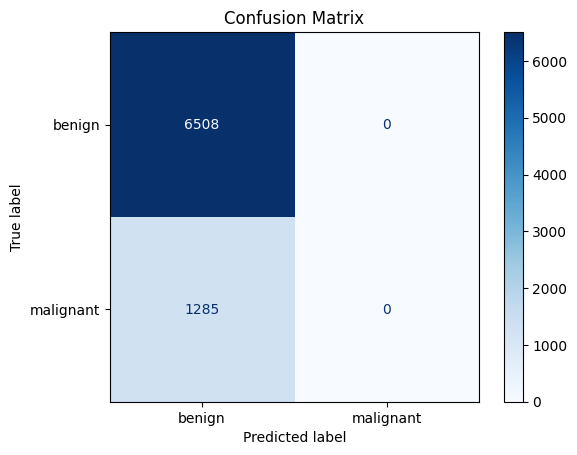

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Tahminler
y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator), axis=1)  # Eğer binary ise: (model.predict(test_generator) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


244/244 ━━━━━━━━━━━━━━━━━━━━ 612s 3s/step


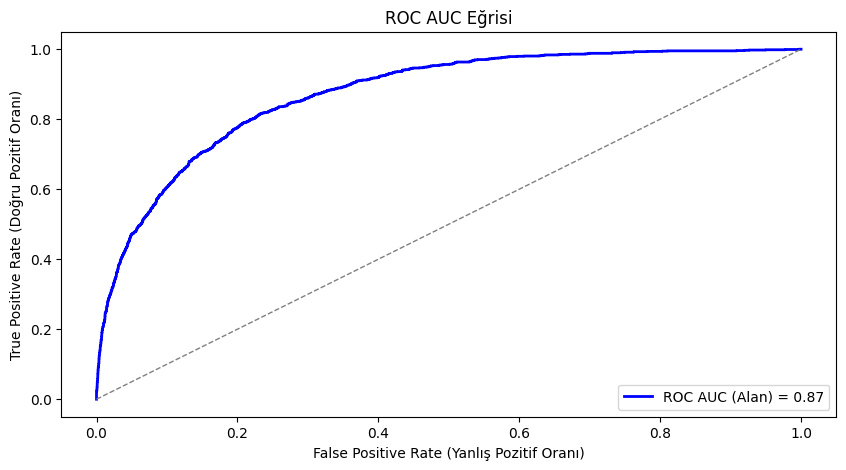

In [ ]:
from sklearn.metrics import roc_curve, auc

# Tahmin olasılıkları ve gerçek etiketler
y_prob = model.predict(test_generator).ravel()
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# ROC eğrisi
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC AUC (Alan) = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('ROC AUC Eğrisi')
plt.xlabel('False Positive Rate (Yanlış Pozitif Oranı)')
plt.ylabel('True Positive Rate (Doğru Pozitif Oranı)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd

# Performans tablosu
performance_table = pd.DataFrame({
    'Metric': ['Test Accuracy', 'Test Loss'],
    'Value': [test_accuracy, test_loss]
})
print(performance_table)


          Metric     Value
0  Test Accuracy  0.852432
1      Test Loss  0.318763


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


              precision    recall  f1-score   support

      benign       0.84      1.00      0.91      6508
   malignant       0.00      0.00      0.00      1285

    accuracy                           0.84      7793
   macro avg       0.42      0.50      0.46      7793
weighted avg       0.70      0.84      0.76      7793



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

# Eğitim veri setini tekrar yükle
train_df = pd.read_csv('/content/drive/MyDrive/dataset_folder/train_dataset.csv')

# Veri tiplerini kontrol et (isteğe bağlı)
print(train_df.head())


         image_name  target benign_malignant status
0  ISIC_1707420.jpg       0           benign  Found
1  ISIC_4191011.jpg       0           benign  Found
2  ISIC_0892453.jpg       0           benign  Found
3  ISIC_0485881.jpg       0           benign  Found
4  ISIC_7836288.jpg       0           benign  Found


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Eğitim veri jeneratörü için veri artırma ayarları
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Görselleri normalize et (0-1 aralığına)
    rotation_range=20,         # Görüntüyü rastgele döndür
    width_shift_range=0.2,     # Rastgele genişlik kaydırma
    height_shift_range=0.2,    # Rastgele yükseklik kaydırma
    shear_range=0.2,           # Kesme işlemi
    zoom_range=0.2,            # Rastgele yakınlaştırma
    horizontal_flip=True,      # Yatay çevirme
    fill_mode='nearest'        # Eksik pikselleri doldurma
)

# Test veri jeneratörü (sadece normalize edilir)
test_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim veri setini yükle
train_df['target'] = train_df['target'].astype(str)  # Hedef sütunu stringe dönüştür
test_df['target'] = test_df['target'].astype(str)    # Hedef sütunu stringe dönüştür

# Preprocessed görsellerin olduğu klasör
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'

# Eğitim veri jeneratörü (Tüm sınıflar için)
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Test veri jeneratörü
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Sınıf ağırlıklarını hesaplayın
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print("Sınıf Ağırlıkları:", class_weights)


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}


In [ ]:
# Sınıf ağırlıklarını hesaplayın
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print("Sınıf Ağırlıkları:", class_weights)


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Flatten ve sınıflandırma için ek katmanlar
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)  # Binary sınıflandırma için sigmoid

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluştur ve derle
model = unet_for_classification()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1048576)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │     134,217,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,363,393 (516.37 MB)

 Trainable params: 135,363,393 (516.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Modeli kaydetmek için checkpoint callback
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_best_with_weights_v2.weights.h5',  # Kaydedilecek dosya
    monitor='val_accuracy',  # Doğrulama doğruluğunu izler
    save_best_only=True,     # Sadece en iyi doğrulama sonuçlarını kaydeder
    save_weights_only=True,  # Sadece ağırlıkları kaydeder
    mode='max',              # Maksimum doğruluğa göre değerlendirme yapar
    verbose=1                # İşlem detaylarını göster
)

# Erken durdurma callback
early_stopping = EarlyStopping(
    monitor='val_loss',      # Doğrulama kaybını izler
    patience=10,             # İyileşme olmazsa 10 epoch sonra durdurur
    restore_best_weights=True  # En iyi ağırlıkları geri yükler
)


In [ ]:
# Model eğitimi
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=15,                   # Eğitim için toplam epoch sayısı
    class_weight=class_weights,  # Sınıf ağırlıkları
    callbacks=[checkpoint, early_stopping]
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.3008 - loss: 0.7600 
Epoch 1: val_accuracy improved from -inf to 0.16487, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_best_with_weights_v2.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 18429s 19s/step - accuracy: 0.3008 - loss: 0.7600 - val_accuracy: 0.1649 - val_loss: 0.6952
Epoch 2/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.3743 - loss: 0.6921
Epoch 2: val_accuracy improved from 0.16487 to 0.83513, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_best_with_weights_v2.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 8957s 9s/step - accuracy: 0.3743 - loss: 0.6921 - val_accuracy: 0.8351 - val_loss: 0.6914
Epoch 3/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7416 - loss: 0.6907
Epoch 3: val_accuracy did not improve from 0.83513
975/975 ━━━━━━━━━━━━━━━━━━━━ 8854s 9s/step - accuracy: 0.7415 - loss: 0.6907 - val_accuracy: 0.1649 - val_loss: 0.6972
Epoch 4/10
975/975 ━━━━

KeyboardInterrupt: 

In [ ]:

# Test setinde modeli değerlendirin
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.8399 - loss: 0.6851
Test Kayıp: 0.6851661205291748
Test Doğruluk: 0.8351295590400696


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Gerçek sınıflar
y_true = test_generator.classes

# Tahmin edilen olasılıklar
y_pred_probs = model.predict(test_generator)

# Tahmin edilen sınıflar
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(class_report)


244/244 ━━━━━━━━━━━━━━━━━━━━ 589s 2s/step
Confusion Matrix:
[[6509    0]
 [1285    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6509
           1       0.00      0.00      0.00      1285

    accuracy                           0.84      7794
   macro avg       0.42      0.50      0.46      7794
weighted avg       0.70      0.84      0.76      7794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


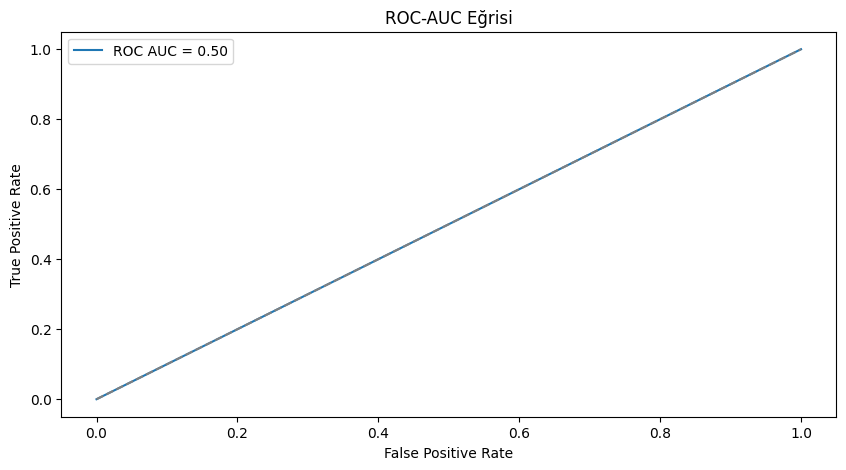

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Tahmin edilen olasılıklar
y_prob = y_pred_probs.ravel()

# ROC eğrisi
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Çizim
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Eğrisi")
plt.legend()
plt.show()


In [ ]:
# Test setinde mevcut ağırlıklarla modeli değerlendirin
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


 50/244 ━━━━━━━━━━━━━━━━━━━━ 7:37 2s/step - accuracy: 0.6622 - loss: 0.4750

KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
# Veri yollarını ayarlayın
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

# CSV dosyalarını yükleyin
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Target sütununu string'e dönüştür
train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# ----------------------------
# 4. IMAGE DATA GENERATOR
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL EĞİTİMİ
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_optimized.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Eğitim
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=50,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping]
)

# ----------------------------
# 6. TEST VE ANALİZ
# ----------------------------
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}
Found 31169 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 21s/step - accuracy: 0.6328 - loss: 0.6543 
Epoch 1: val_accuracy improved from -inf to 0.70593, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 25647s 26s/step - accuracy: 0.6328 - loss: 0.6542 - val_accuracy: 0.7059 - val_loss: 0.4669
Epoch 2/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6144 - loss: 0.5666
Epoch 2: val_accuracy did not improve from 0.70593
975/975 ━━━━━━━━━━━━━━━━━━━━ 9204s 9s/step - accuracy: 0.6144 - loss: 0.5666 - val_accuracy: 0.6735 - val_loss: 0.5004
Epoch 3/50
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6106 - loss: 0.5415
Epoch 3: val_accuracy did not improve from 0.70593
975/975 ━━━━━━━━━━━━━━━━━━━━ 9006s 9s/step - accuracy: 0.6106 - loss: 0.5415 - val_accuracy: 0.6603 - val_loss: 0.4785
Epoch 4/50
 38/975 ━━━━━━━━━━━━━━━━━━━━ 2:22:04 9s/step - accuracy: 0.6051 - loss: 0.5096

KeyboardInterrupt: 

In [ ]:
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized.weights.h5')

# Test setinde performansı değerlendirin
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 575s 2s/step - accuracy: 0.7032 - loss: 0.4663
Test Kayıp: 0.4668690860271454
Test Doğruluk: 0.7059276103973389


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Gerçek ve tahmin edilen değerler
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Gerçek ve tahmin edilen sınıflar
y_true = test_generator.classes  # Gerçek etiketler
y_pred_probs = model.predict(test_generator)  # Tahmin edilen olasılıklar
y_pred = (y_pred_probs > 0.5).astype(int).ravel()  # Olasılıkları sınıfa dönüştürme

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


244/244 ━━━━━━━━━━━━━━━━━━━━ 577s 2s/step
Confusion Matrix:
[[4589 1920]
 [ 372  913]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.71      0.80      6509
           1       0.32      0.71      0.44      1285

    accuracy                           0.71      7794
   macro avg       0.62      0.71      0.62      7794
weighted avg       0.83      0.71      0.74      7794



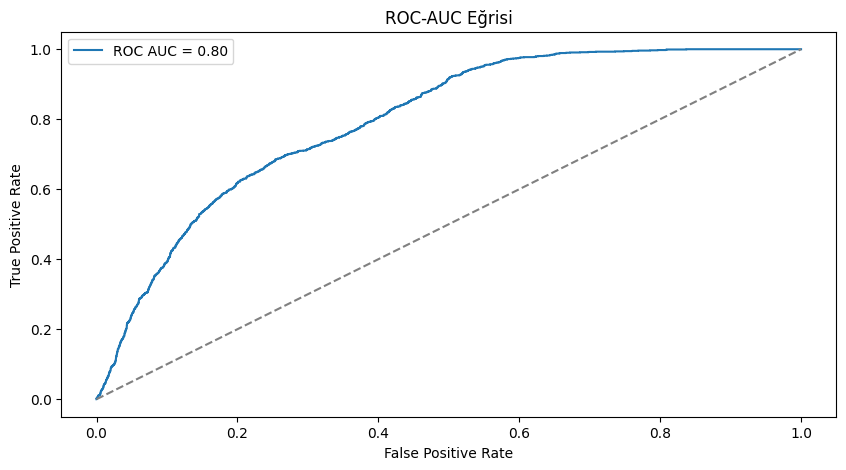

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Eğrisi")
plt.legend()
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# **1. Veri Yolları**
train_dataset_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_dataset_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'

# Veri setlerini yükleyin
train_df = pd.read_csv(train_dataset_path)
test_df = pd.read_csv(test_dataset_path)

# **2. Sınıf Ağırlıklarını Hesapla**
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# **3. Augmentation**
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

# **4. Veri Jeneratörleri**
train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# **5. UNet Modeli**
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_for_classification()

# **6. Focal Loss**
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_pred = tf.keras.backend.clip(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())
        loss = -y_true * alpha * tf.keras.backend.pow(1 - y_pred, gamma) * tf.keras.backend.log(y_pred) \
               - (1 - y_true) * (1 - alpha) * tf.keras.backend.pow(y_pred, gamma) * tf.keras.backend.log(1 - y_pred)
        return tf.keras.backend.mean(loss)
    return focal_loss_fixed

# **7. Model Derleme**
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# **8. Callbacks**
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_optimized_focal.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7, verbose=1)

# **9. Model Eğitimi**
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# **10. Performans Analizi**
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ROC-AUC Eğrisi
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Eğrisi")
plt.legend()
plt.show()


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}
Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8302 - loss: 0.7064
Epoch 1: val_accuracy improved from -inf to 0.83513, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_focal.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 8668s 9s/step - accuracy: 0.8302 - loss: 0.7064 - val_accuracy: 0.8351 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 2/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8387 - loss: 0.6862
Epoch 2: val_accuracy did not improve from 0.83513
975/975 ━━━━━━━━━━━━━━━━━━━━ 8804s 9s/step - accuracy: 0.8387 - loss: 0.6863 - val_accuracy: 0.8351 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 3/10
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8348 - loss: 0.7080
Epoch 3: val_accuracy did not improve from 0.83513
975/975 ━━━━━━━━━━━━━━━━━━━━ 8702s 9s/step - accuracy: 0.8348 - loss: 0.7080 - val_accuracy: 0.8351 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 4/10
557/975 ━━━━━━━━━━━━━━━━━━━━ 1:04:31 9s/step - accuracy: 0.8

KeyboardInterrupt: 

In [ ]:
# Modeli yükle (Eğer ağırlıkları kaydettiyseniz)
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized_focal.weights.h5')

# Test setinde değerlendirme
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.8399 - loss: 0.6453
Test Kayıp: 0.6643492579460144
Test Doğruluk: 0.8351295590400696


In [ ]:
# Test setinde tahminler
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()


244/244 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[6509    0]
 [1285    0]]


In [ ]:
from sklearn.metrics import classification_report

# Classification Report
target_names = list(test_generator.class_indices.keys())  # Sınıf isimlerini alın
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=target_names))



Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      6509
           1       0.00      0.00      0.00      1285

    accuracy                           0.84      7794
   macro avg       0.42      0.50      0.46      7794
weighted avg       0.70      0.84      0.76      7794



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


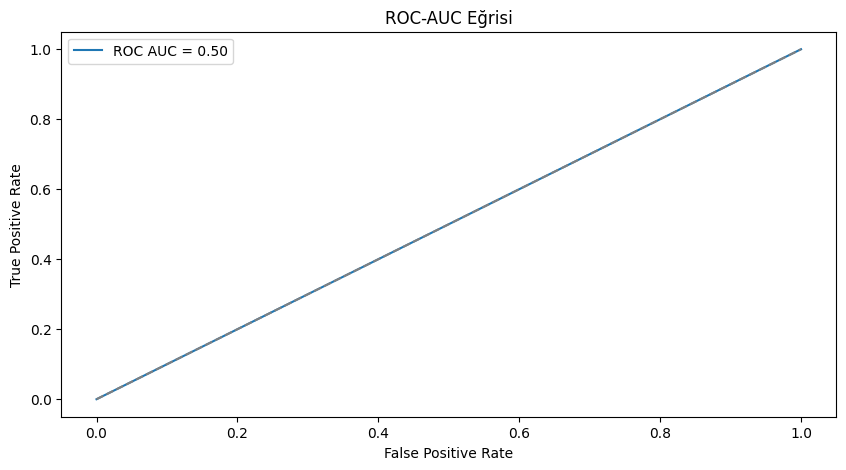

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC Curve ve AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# ROC Eğrisini Çiz
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Eğrisi")
plt.legend()
plt.show()


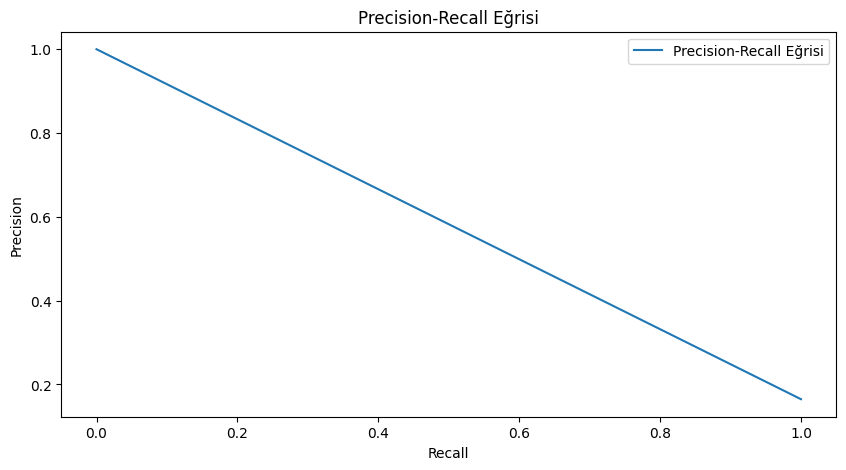

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_true, y_pred_probs.ravel())

# Precision-Recall Eğrisi
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, label="Precision-Recall Eğrisi")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Eğrisi")
plt.legend()
plt.show()


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# ----------------------------
# 4. IMAGE DATA GENERATOR
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL EĞİTİMİ
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v2.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Daha kısa sürede erken durdurma
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

# Eğitim
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,  # Daha kısa epoch sayısı
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# ----------------------------
# 6. TEST VE ANALİZ
# ----------------------------
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# Test sonuçlarını analiz etmek için önceki kodları kullanabilirsiniz.


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset_folder/train_dataset.csv'

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Klasör ve dosya yolları
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

# Veri setlerini yükleyin
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


In [ ]:
# Modeli yeniden oluşturun
def unet_for_classification(input_size=(256, 256, 3)):
    from tensorflow.keras.models import Model
    from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_for_classification(input_size=(256, 256, 3))

# Model ağırlıklarını yükleyin
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v2.weights.h5')
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,  # Kalan epoch sayısını belirleyin
    callbacks=[
        ModelCheckpoint(filepath='/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v2.weights.h5', monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1),
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
    ]
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 14/975 ━━━━━━━━━━━━━━━━━━━━ 7:38:56 29s/step - accuracy: 0.8143 - loss: 0.4139

KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 15/244 ━━━━━━━━━━━━━━━━━━━━ 1:38:06 26s/step - accuracy: 0.8931 - loss: 0.2892

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Tahminler
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Sınıflandırma raporu
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))


Test veri jeneratörü hazırlanıyor...
Found 7794 validated image filenames belonging to 2 classes.
Model ağırlıkları yükleniyor...
Model ağırlıkları başarıyla yüklendi!
Test işlemi başlıyor...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


244/244 ━━━━━━━━━━━━━━━━━━━━ 6181s 25s/step - accuracy: 0.7207 - loss: 0.4712
Test Kayıp: 0.4617408514022827
Test Doğruluk: 0.7232486605644226
244/244 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step

Confusion Matrix:
[[4539 1970]
 [ 187 1098]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.70      0.81      6509
           1       0.36      0.85      0.50      1285

    accuracy                           0.72      7794
   macro avg       0.66      0.78      0.66      7794
weighted avg       0.86      0.72      0.76      7794



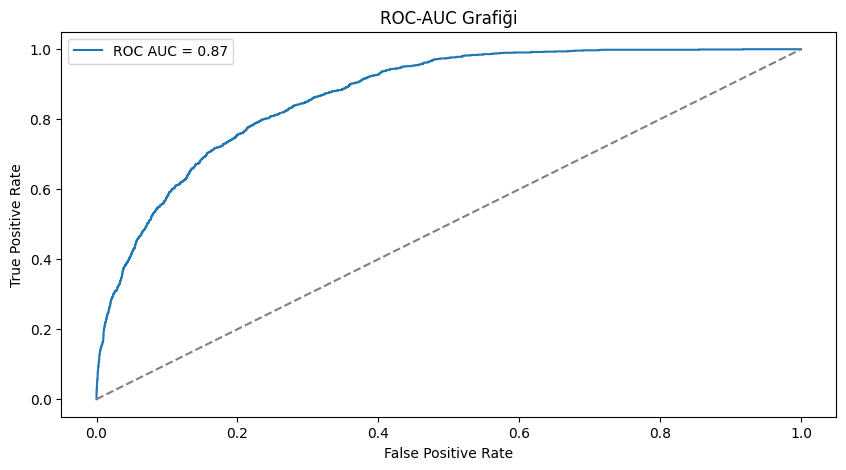

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# ----------------------------
# 1. AYARLAR VE DOSYA YOLLARI
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'
model_weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v2.weights.h5'

# ----------------------------
# 2. VERİYİ HAZIRLAMA
# ----------------------------
test_df = pd.read_csv(test_csv_path)
test_df['target'] = test_df['target'].astype(str)

# Test veri jeneratörü
print("Test veri jeneratörü hazırlanıyor...")
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 3. MODELİ YÜKLEME
# ----------------------------
print("Model ağırlıkları yükleniyor...")
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

model = unet_for_classification()
model.load_weights(model_weights_path)
print("Model ağırlıkları başarıyla yüklendi!")

# ----------------------------
# 4. TEST VE ANALİZ
# ----------------------------
print("Test işlemi başlıyor...")
# Modeli yeniden derleyin
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Test işlemi
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# Tahminler yapın
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Performans Analizi
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ROC-AUC Grafiği
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Grafiği")
plt.legend()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# ----------------------------
# 4. IMAGE DATA GENERATOR
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Daha az agresif augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL EĞİTİMİ
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint(
    filepath='/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    mode='max',
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-7,
    verbose=1
)

# Eğitim
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Daha uzun eğitim, erken durdurma devrede
    class_weight=class_weights,
    callbacks=[checkpoint, early_stopping, lr_scheduler]
)

# ----------------------------
# 6. TEST VE ANALİZ
# ----------------------------
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# ROC-AUC analizi ve sınıflandırma raporu ekleyebilirsiniz.


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}
Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 25s/step - accuracy: 0.6692 - loss: 0.6509 
Epoch 1: val_accuracy improved from -inf to 0.71119, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 25415s 26s/step - accuracy: 0.6691 - loss: 0.6508 - val_accuracy: 0.7112 - val_loss: 0.5103 - learning_rate: 5.0000e-05
Epoch 2/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6284 - loss: 0.5648 
Epoch 2: val_accuracy did not improve from 0.71119
975/975 ━━━━━━━━━━━━━━━━━━━━ 10764s 11s/step - accuracy: 0.6284 - loss: 0.5648 - val_accuracy: 0.7061 - val_loss: 0.4809 - learning_rate: 5.0000e-05
Epoch 3/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.6211 - loss: 0.5440 
Epoch 3: val_accuracy did not improve from 0.71119
975/975 ━━━━━━━━━━━━━━━━━━━━ 10649s 11s/step - accuracy: 0.6211 - loss: 0.5440 - val_accuracy: 0.6697 - val_loss: 0.4792 - learning_rate: 5.0000e-05
Epoch 4/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/ste

In [ ]:
# Test işlemi
print("Test işlemi başlıyor...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# Tahminler
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion Matrix ve Classification Report
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# ROC AUC Eğrisi
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC AUC (Alan): {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC AUC Eğrisi")
plt.legend()
plt.grid()
plt.show()


Test işlemi başlıyor...
  9/244 ━━━━━━━━━━━━━━━━━━━━ 1:14:29 19s/step - accuracy: 0.8157 - loss: 0.4017

KeyboardInterrupt: 

In [ ]:
model = unet_for_classification(input_size=(256, 256, 3))


In [ ]:
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5')
print("Model ağırlıkları başarıyla yüklendi!")


Model ağırlıkları başarıyla yüklendi!


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


244/244 ━━━━━━━━━━━━━━━━━━━━ 4848s 20s/step - accuracy: 0.8309 - loss: 0.3757
Test Kayıp: 0.36920005083084106
Test Doğruluk: 0.8319219946861267


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Gerçek ve tahmin edilen sınıfları alın
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)  # Tahmin edilen olasılıklar
y_pred = (y_pred_probs > 0.5).astype(int).ravel()  # Olasılıkları sınıfa çevir

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(class_report)


244/244 ━━━━━━━━━━━━━━━━━━━━ 652s 3s/step
Confusion Matrix:
[[5430 1079]
 [ 231 1054]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      6509
           1       0.49      0.82      0.62      1285

    accuracy                           0.83      7794
   macro avg       0.73      0.83      0.75      7794
weighted avg       0.88      0.83      0.85      7794



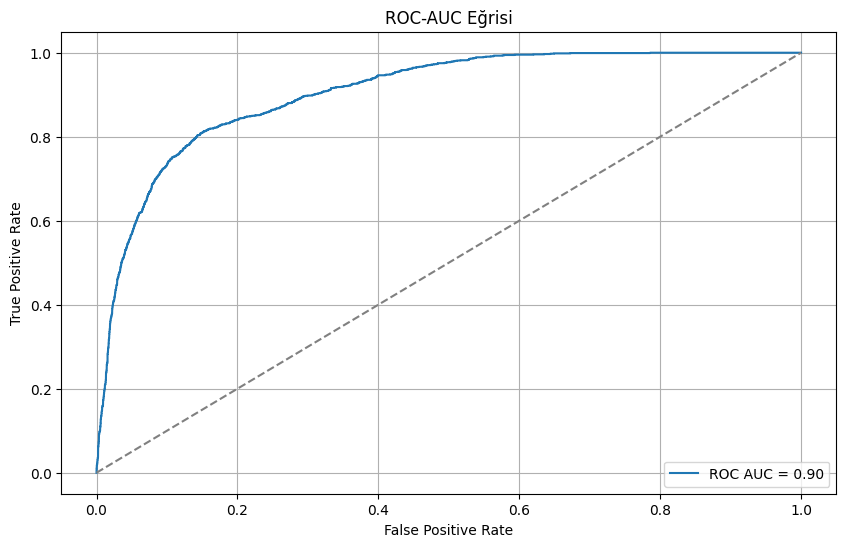

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC eğrisi için veriler
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

# ROC-AUC Grafiği
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Eğrisi")
plt.legend(loc="lower right")
plt.grid()
plt.show()


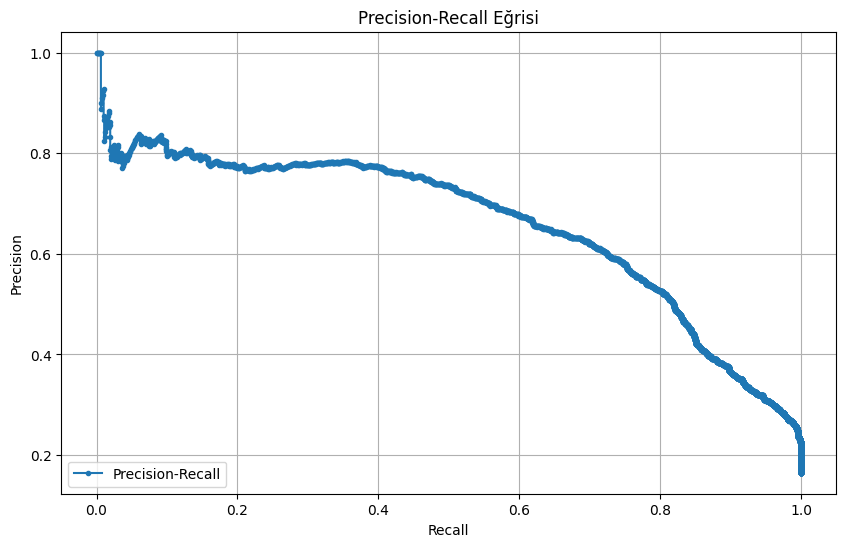

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_pred_probs.ravel())

# Precision-Recall Grafiği
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label="Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Eğrisi")
plt.legend(loc="lower left")
plt.grid()
plt.show()


In [ ]:
import numpy as np

# Görseller ve tahminler
file_paths = test_generator.filepaths
correct = np.where(y_true == y_pred)[0]
incorrect = np.where(y_true != y_pred)[0]

# Doğru tahmin edilen ilk 5 görsel
print("Doğru Tahmin Edilenler:")
for i in correct[:5]:
    print(file_paths[i])

# Yanlış tahmin edilen ilk 5 görsel
print("\nYanlış Tahmin Edilenler:")
for i in incorrect[:5]:
    print(file_paths[i])


Doğru Tahmin Edilenler:
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_5130786.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_1559422.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_7376684.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_3557376.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_2674129.jpg

Yanlış Tahmin Edilenler:
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_7400458.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_1293403.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_1567899.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_8334299.jpg
/content/drive/MyDrive/dataset_folder/preprocessed/ISIC_4996867.jpg


In [ ]:
import numpy as np

# Her sınıf için ortalama olasılıklar
class_0_mean_prob = np.mean(y_pred_probs[y_true == 0])
class_1_mean_prob = np.mean(y_pred_probs[y_true == 1])
print(f"Sınıf 0 (Kanser Yok) Ortalama Olasılığı: {class_0_mean_prob:.2f}")
print(f"Sınıf 1 (Kanser Var) Ortalama Olasılığı: {class_1_mean_prob:.2f}")


Sınıf 0 (Kanser Yok) Ortalama Olasılığı: nan
Sınıf 1 (Kanser Var) Ortalama Olasılığı: nan


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))

# ----------------------------
# 4. IMAGE DATA GENERATOR
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL YENİDEN TANIMLANIYOR VE AĞIRLIKLAR YÜKLENİYOR
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# Daha önce kaydedilmiş ağırlıklar yükleniyor
weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model.load_weights(weights_path)

# ----------------------------
# 6. EĞİTİME DEVAM
# ----------------------------
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Toplam epoch sayısı (önceki eğitimle birlikte)
    initial_epoch=6,  # En son tamamlanan epoch'tan itibaren devam et
    class_weight=class_weights,
    callbacks=[
        ModelCheckpoint(filepath=weights_path, monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7, verbose=1)
    ]
)

Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 7/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 20s/step - accuracy: 0.7343 - loss: 0.4741 
Epoch 7: val_accuracy improved from -inf to 0.82653, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 20505s 21s/step - accuracy: 0.7343 - loss: 0.4741 - val_accuracy: 0.8265 - val_loss: 0.3618 - learning_rate: 5.0000e-05
Epoch 8/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7467 - loss: 0.4482
Epoch 8: val_accuracy improved from 0.82653 to 0.89877, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 9271s 10s/step - accuracy: 0.7467 - loss: 0.4482 - val_accuracy: 0.8988 - val_loss: 0.2804 - learning_rate: 5.0000e-05
Epoch 9/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.7635 - loss: 0.4388
Epoch 9: val_accuracy did not improve from 0.89877
975/975 ━━━━━━━━━━━━━━━━━━━━ 8899s 9s/step - accuracy: 0.7635 - loss: 0.4388 - val_accuracy: 0.8895 -

KeyboardInterrupt: 

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# ----------------------------
# 1. MODELİ YENİDEN TANIMLAYIN
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))

# ----------------------------
# 2. MODEL AĞIRLIKLARINI YÜKLEYİN
# ----------------------------
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5')
print("Model ağırlıkları başarıyla yüklendi!")

# ----------------------------
# 3. MODELİ DERLEYİN
# ----------------------------
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# ----------------------------
# 4. TEST SETİNİ DEĞERLENDİRİN
# ----------------------------
print("Test işlemi başlıyor...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# ----------------------------
# 5. TAHMİNLERİ OLUŞTURUN
# ----------------------------
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# ----------------------------
# 6. KARMAŞIKLIK MATRİSİ
# ----------------------------
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ----------------------------
# 7. CLASSIFICATION REPORT
# ----------------------------
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(report)

# ----------------------------
# 8. ROC-AUC ANALİZİ
# ----------------------------
fpr, tpr, _ = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Eğrisi')
plt.legend(loc='lower right')
plt.show()

# ----------------------------
# 9. TAHMİN GÖRSELLERİ
# ----------------------------
# Doğru tahmin edilenler
correct_predictions = [
    test_generator.filepaths[i] for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == pred
]
print("\nDoğru Tahmin Edilenler (İlk 5):")
print(correct_predictions[:5])

# Yanlış tahmin edilenler
incorrect_predictions = [
    test_generator.filepaths[i] for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred
]
print("\nYanlış Tahmin Edilenler (İlk 5):")
print(incorrect_predictions[:5])

# ----------------------------
# 10. ORTALAMA OLASILIKLAR
# ----------------------------
avg_prob_class_0 = np.mean(y_pred_probs[y_true == 0]) if np.any(y_true == 0) else None
avg_prob_class_1 = np.mean(y_pred_probs[y_true == 1]) if np.any(y_true == 1) else None
print(f"\nSınıf 0 (Kanser Yok) Ortalama Olasılığı: {avg_prob_class_0}")
print(f"Sınıf 1 (Kanser Var) Ortalama Olasılığı: {avg_prob_class_1}")


NameError: name 'unet_for_classification' is not defined

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. MODEL AĞIRLIKLARINI YÜKLEYİN
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.load_weights('/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5')
print("Model ağırlıkları başarıyla yüklendi!")

# ----------------------------
# 3. MODELİ DERLEYİN
# ----------------------------
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# ----------------------------
# 4. TEST SETİNİ DEĞERLENDİRİN
# ----------------------------
print("Test işlemi başlıyor...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")

# ----------------------------
# 5. TAHMİNLERİ OLUŞTURUN
# ----------------------------
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# ----------------------------
# 6. KARMAŞIKLIK MATRİSİ
# ----------------------------
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ----------------------------
# 7. CLASSIFICATION REPORT
# ----------------------------
report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(report)

# ----------------------------
# 8. ROC-AUC ANALİZİ
# ----------------------------
fpr, tpr, _ = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Eğrisi')
plt.legend(loc='lower right')
plt.show()

# ----------------------------
# 9. TAHMİN GÖRSELLERİ
# ----------------------------
correct_predictions = [
    test_generator.filepaths[i] for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true == pred
]
print("\nDoğru Tahmin Edilenler (İlk 5):")
print(correct_predictions[:5])

incorrect_predictions = [
    test_generator.filepaths[i] for i, (true, pred) in enumerate(zip(y_true, y_pred)) if true != pred
]
print("\nYanlış Tahmin Edilenler (İlk 5):")
print(incorrect_predictions[:5])

# ----------------------------
# 10. ORTALAMA OLASILIKLAR
# ----------------------------
avg_prob_class_0 = np.mean(y_pred_probs[y_true == 0]) if np.any(y_true == 0) else None
avg_prob_class_1 = np.mean(y_pred_probs[y_true == 1]) if np.any(y_true == 1) else None
print(f"\nSınıf 0 (Kanser Yok) Ortalama Olasılığı: {avg_prob_class_0}")
print(f"Sınıf 1 (Kanser Var) Ortalama Olasılığı: {avg_prob_class_1}")


Model ağırlıkları başarıyla yüklendi!
Test işlemi başlıyor...


NameError: name 'test_generator' is not defined

In [ ]:
# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

# Gerekli kütüphaneleri içe aktarma
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODELİ YENİDEN TANIMLAYIN
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluşturun
model = unet_for_classification(input_size=(256, 256, 3))

# ----------------------------
# 2. VERİ SETİ VE TEST JENERATÖRÜ
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

# Test veri setini yükleyin
test_df = pd.read_csv(test_csv_path)
test_df['target'] = test_df['target'].astype(str)

# Test için ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 3. AĞIRLIKLARI YÜKLEYİN
# ----------------------------
weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model.load_weights(weights_path)
print("Model ağırlıkları başarıyla yüklendi!")

# ----------------------------
# 4. TEST MODELİ
# ----------------------------
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

print("Test işlemi başlıyor...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7793 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Model ağırlıkları başarıyla yüklendi!
Test işlemi başlıyor...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


244/244 ━━━━━━━━━━━━━━━━━━━━ 6348s 26s/step - accuracy: 0.9027 - loss: 0.2618
Test Kayıp: 0.2639007866382599
Test Doğruluk: 0.9032465219497681


Tahminler alınıyor...
244/244 ━━━━━━━━━━━━━━━━━━━━ 578s 2s/step

Confusion Matrix:
[[6094  414]
 [ 340  945]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      6508
           1       0.70      0.74      0.71      1285

    accuracy                           0.90      7793
   macro avg       0.82      0.84      0.83      7793
weighted avg       0.91      0.90      0.90      7793



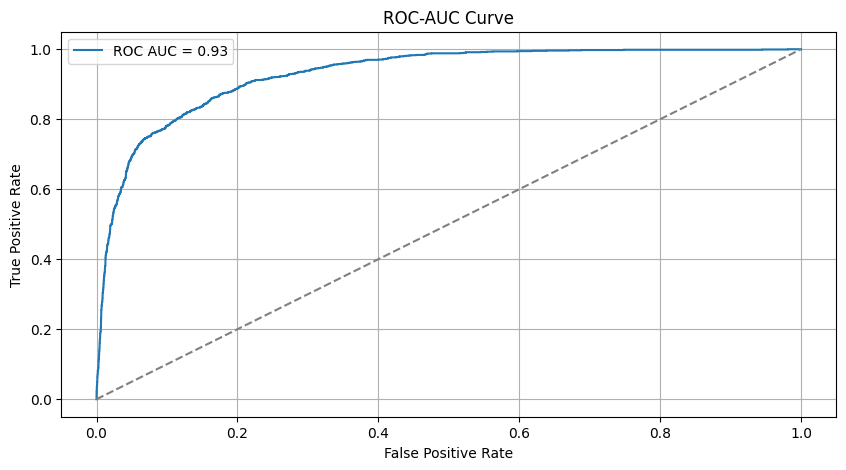


Doğru Tahmin Edilen Görüntüler:
['ISIC_7400458.jpg', 'ISIC_1559422.jpg', 'ISIC_7376684.jpg', 'ISIC_3557376.jpg', 'ISIC_1293403.jpg']

Yanlış Tahmin Edilen Görüntüler:
['ISIC_1567899.jpg', 'ISIC_7893391.jpg', 'ISIC_2110862.jpg', 'ISIC_7265673_0_3352.jpg', 'ISIC_0639415.jpg']

Sınıf 0 (Kanser Yok) Ortalama Olasılığı: None
Sınıf 1 (Kanser Var) Ortalama Olasılığı: None


In [ ]:
# Gerekli kütüphaneler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 5. TAHMİNLER VE TEST ANALİZİ
# ----------------------------
print("Tahminler alınıyor...")
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(class_report)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid()
plt.show()

# ----------------------------
# 6. DETAYLI ANALİZ
# ----------------------------
# Doğru tahmin edilen görüntüler
correct_predictions = np.where(y_true == y_pred)[0]
print("\nDoğru Tahmin Edilen Görüntüler:")
print([test_generator.filenames[i] for i in correct_predictions[:5]])  # İlk 5 doğru tahmin

# Yanlış tahmin edilen görüntüler
incorrect_predictions = np.where(y_true != y_pred)[0]
print("\nYanlış Tahmin Edilen Görüntüler:")
print([test_generator.filenames[i] for i in incorrect_predictions[:5]])  # İlk 5 yanlış tahmin

# Ortalama olasılıklar
class_0_probs = y_pred_probs[y_true == 0]
class_1_probs = y_pred_probs[y_true == 1]

avg_prob_class_0 = np.mean(class_0_probs) if len(class_0_probs) > 0 else None
avg_prob_class_1 = np.mean(class_1_probs) if len(class_1_probs) > 0 else None

print(f"\nSınıf 0 (Kanser Yok) Ortalama Olasılığı: {avg_prob_class_0}")
print(f"Sınıf 1 (Kanser Var) Ortalama Olasılığı: {avg_prob_class_1}")

In [ ]:

import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = {0: 1.0, 1: 2.0}

# ----------------------------
# 4. IMAGE DATA GENERATOR
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL YENİDEN TANIMLANIYOR VE AĞIRLIKLAR YÜKLENİYOR
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

# Daha önce kaydedilmiş ağırlıklar yükleniyor
weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model.load_weights(weights_path)

# ----------------------------
# 6. EĞİTİME DEVAM
# ----------------------------
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,  # Toplam epoch sayısı (önceki eğitimle birlikte)
    initial_epoch=14,  # En son tamamlanan epoch'tan itibaren devam et
    class_weight=class_weights,
    callbacks=[
        ModelCheckpoint(filepath=weights_path, monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
    ]
)

Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Epoch 15/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 24s/step - accuracy: 0.8366 - loss: 0.5126 
Epoch 15: val_accuracy improved from -inf to 0.88799, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 24631s 25s/step - accuracy: 0.8367 - loss: 0.5126 - val_accuracy: 0.8880 - val_loss: 0.2745 - learning_rate: 5.0000e-05
Epoch 16/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8421 - loss: 0.4865
Epoch 16: val_accuracy did not improve from 0.88799
975/975 ━━━━━━━━━━━━━━━━━━━━ 9973s 10s/step - accuracy: 0.8422 - loss: 0.4865 - val_accuracy: 0.8876 - val_loss: 0.2685 - learning_rate: 5.0000e-05
Epoch 17/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.8450 - loss: 0.4661
Epoch 17: val_accuracy did not improve from 0.88799
975/975 ━━━━━━━━━━━━━━━━━━━━ 10230s 10s/step - accuracy: 0.8450 - loss: 0.4661 - val_accuracy: 0.8867 - val_loss: 0.2779 - learning_rate: 5.0000e-05
Epoch 18/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Google Drive bağlantısı
from google.colab import drive
drive.mount('/content/drive')

# Gerekli kütüphaneleri içe aktarma
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODELİ YENİDEN TANIMLAYIN
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# Modeli oluşturun
model = unet_for_classification(input_size=(256, 256, 3))

# ----------------------------
# 2. VERİ SETİ VE TEST JENERATÖRÜ
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

# Test veri setini yükleyin
test_df = pd.read_csv(test_csv_path)
test_df['target'] = test_df['target'].astype(str)

# Test için ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 3. AĞIRLIKLARI YÜKLEYİN
# ----------------------------
weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model.load_weights(weights_path)
print("Model ağırlıkları başarıyla yüklendi!")

# ----------------------------
# 4. TEST MODELİ
# ----------------------------
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

print("Test işlemi başlıyor...")
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Kayıp: {test_loss}")
print(f"Test Doğruluk: {test_accuracy}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 7794 validated image filenames belonging to 2 classes.
Model ağırlıkları başarıyla yüklendi!
Test işlemi başlıyor...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


244/244 ━━━━━━━━━━━━━━━━━━━━ 2620s 11s/step - accuracy: 0.8926 - loss: 0.2651
Test Kayıp: 0.2695668339729309
Test Doğruluk: 0.890556812286377


Tahminler alınıyor...
244/244 ━━━━━━━━━━━━━━━━━━━━ 542s 2s/step

Confusion Matrix:
[[6216  293]
 [ 560  725]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6509
           1       0.71      0.56      0.63      1285

    accuracy                           0.89      7794
   macro avg       0.81      0.76      0.78      7794
weighted avg       0.88      0.89      0.89      7794



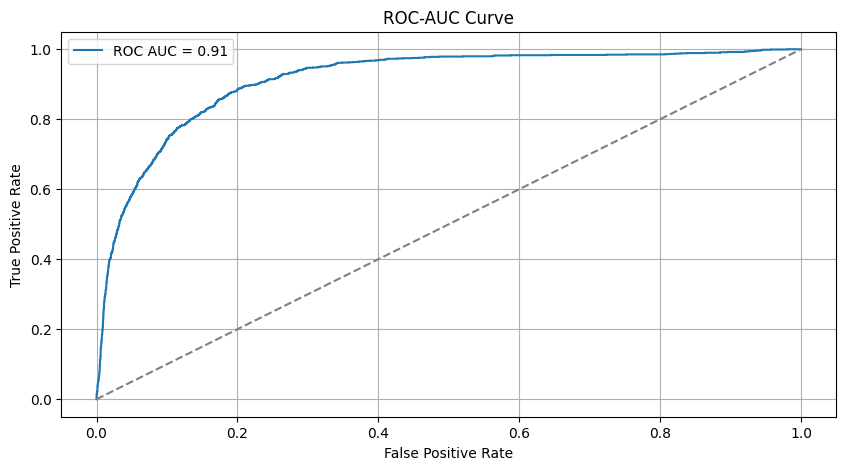


Doğru Tahmin Edilen Görüntüler:
['ISIC_5130786.jpg', 'ISIC_1559422.jpg', 'ISIC_7376684.jpg', 'ISIC_3557376.jpg', 'ISIC_1293403.jpg']

Yanlış Tahmin Edilen Görüntüler:
['ISIC_7400458.jpg', 'ISIC_7893391.jpg', 'ISIC_2110862.jpg', 'ISIC_9677503.jpg', 'ISIC_9978107_0_1167.jpg']

Sınıf 0 (Kanser Yok) Ortalama Olasılığı: None
Sınıf 1 (Kanser Var) Ortalama Olasılığı: None


In [ ]:
# Gerekli kütüphaneler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# 5. TAHMİNLER VE TEST ANALİZİ
# ----------------------------
print("Tahminler alınıyor...")
y_true = test_generator.classes
y_pred_probs = model.predict(test_generator)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys())
print("\nClassification Report:")
print(class_report)

# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend()
plt.grid()
plt.show()

# ----------------------------
# 6. DETAYLI ANALİZ
# ----------------------------
# Doğru tahmin edilen görüntüler
correct_predictions = np.where(y_true == y_pred)[0]
print("\nDoğru Tahmin Edilen Görüntüler:")
print([test_generator.filenames[i] for i in correct_predictions[:5]])  # İlk 5 doğru tahmin

# Yanlış tahmin edilen görüntüler
incorrect_predictions = np.where(y_true != y_pred)[0]
print("\nYanlış Tahmin Edilen Görüntüler:")
print([test_generator.filenames[i] for i in incorrect_predictions[:5]])  # İlk 5 yanlış tahmin

# Ortalama olasılıklar
class_0_probs = y_pred_probs[y_true == 0]
class_1_probs = y_pred_probs[y_true == 1]

avg_prob_class_0 = np.mean(class_0_probs) if len(class_0_probs) > 0 else None
avg_prob_class_1 = np.mean(class_1_probs) if len(class_1_probs) > 0 else None

print(f"\nSınıf 0 (Kanser Yok) Ortalama Olasılığı: {avg_prob_class_0}")
print(f"Sınıf 1 (Kanser Var) Ortalama Olasılığı: {avg_prob_class_1}")

In [ ]:


import zipfile
import os

# ZIP dosyasının yolu ve hedef klasör
zip_path = "/content/drive/MyDrive/dataset_folder/ISIC_2019_Test_Input.zip"
output_folder = "/content/drive/MyDrive/dataset_folder/ISIC_Test_Input"

# ZIP dosyasını çıkarma
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(output_folder)
    print(f"ZIP dosyası başarıyla çıkarıldı: {output_folder}")

ZIP dosyası başarıyla çıkarıldı: /content/drive/MyDrive/dataset_folder/ISIC_Test_Input


In [ ]:




import pandas as pd

# Orijinal CSV'yi yükle
csv_path = "/content/drive/MyDrive/dataset_folder/ISIC_2019_Test_GroundTruth.csv"
df = pd.read_csv(csv_path)

# Yeni bir sütun ekle: 'is_cancer' (Kanser ise 1, değilse 0)
df['is_cancer'] = df[['MEL', 'BCC', 'AK', 'SCC']].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Sadece görsel adı ve kanser bilgisini içeren yeni bir CSV oluştur
binary_csv_path = "/content/drive/MyDrive/dataset_folder/ISIC_2019_Test_Binary.csv"
df[['image', 'is_cancer']].to_csv(binary_csv_path, index=False)

print(f"Yeni binary CSV dosyası kaydedildi: {binary_csv_path}")

Yeni binary CSV dosyası kaydedildi: /content/drive/MyDrive/dataset_folder/ISIC_2019_Test_Binary.csv


In [ ]:



import os
import pandas as pd

# Görsellerin bulunduğu klasör ve CSV dosyasının yolları
images_folder = "/content/drive/MyDrive/dataset_folder/ISIC_Test_Input/ISIC_2019_Test_Input"
csv_file_path = "/content/drive/MyDrive/dataset_folder/ISIC_2019_Test_Binary.csv"

# CSV'yi yükle
df = pd.read_csv(csv_file_path)

# Görsel dosyalarının isimlerini al
image_files = os.listdir(images_folder)

# Görsellerin isimlerini CSV'deki 'image' sütunuyla eşleştir
df['exists'] = df['image'].apply(lambda x: 1 if f"{x}.jpg" in image_files else 0)

# Sadece mevcut görselleri filtrele
filtered_df = df[df['exists'] == 1]

# 'exists' sütununu kaldır ve yeni CSV olarak kaydet
filtered_df = filtered_df.drop(columns=['exists'])
filtered_df.to_csv("/content/drive/MyDrive/Filtered_ISIC_2019_Test_Binary.csv", index=False)

print("Eşleştirme tamamlandı ve yeni CSV kaydedildi.")

Eşleştirme tamamlandı ve yeni CSV kaydedildi.


In [ ]:


print(f"Eşleşen görsellerin sayısı: {len(filtered_df)}")

Eşleşen görsellerin sayısı: 8238


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. MODELİ YÜKLEME
# ----------------------------
model_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model = unet_for_classification(input_size=(256, 256, 3))
model.load_weights(model_path)
print("Model başarıyla yüklendi!")

# ----------------------------
# 3. TEST GÖRSELLERİ İÇİN DATA GENERATOR
# ----------------------------
test_folder = '/content/drive/MyDrive/dataset_folder/ISIC_Test_Input/ISIC_2019_Test_Input'
test_csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_Binary.csv'  # Sadece görsel isimlerini içeren CSV
output_csv_path = '/content/drive/MyDrive/dataset_folder/test_predictions.csv'

test_df = pd.read_csv(test_csv_path)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_folder,
    x_col='image',
    y_col=None,  # Test setinde etiket olmadığı için None
    target_size=(256, 256),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# ----------------------------
# 4. TAHMİN YAPMA VE SONUÇLARI KAYDETME
# ----------------------------
predictions = model.predict(test_generator, verbose=1)
binary_predictions = (predictions > 0.5).astype(int)  # Threshold'u 0.5 olarak belirledik

# Tahminleri CSV olarak kaydetme
test_df['prediction'] = binary_predictions
test_df['probability'] = predictions
test_df.to_csv(output_csv_path, index=False)
print(f"Tahminler başarıyla kaydedildi: {output_csv_path}")


Model başarıyla yüklendi!
Found 0 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 8238 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  warnings.warn(


ValueError: Must provide at least one structure

In [ ]:
import pandas as pd

# CSV dosyasının yolu
csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_Binary.csv'
output_csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly.csv'

# CSV dosyasını yükle
df = pd.read_csv(csv_path)

# Sadece "image" sütununu al
df = df[['image']]

# Yeni CSV olarak kaydet
df.to_csv(output_csv_path, index=False)

print(f"Yeni CSV başarıyla kaydedildi: {output_csv_path}")



Yeni CSV başarıyla kaydedildi: /content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly.csv


In [ ]:
import pandas as pd

# Giriş ve çıkış dosyalarının yolları
csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly.csv'
output_csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly_with_JPG.csv'

# CSV dosyasını yükle
df = pd.read_csv(csv_path)

# "image" sütunundaki her isme ".jpg" ekle
df['image'] = df['image'] + '.jpg'

# Yeni CSV olarak kaydet
df.to_csv(output_csv_path, index=False)

print(f"Güncellenmiş CSV başarıyla kaydedildi: {output_csv_path}")


Güncellenmiş CSV başarıyla kaydedildi: /content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly_with_JPG.csv


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ----------------------------
# 1. MODELİ YÜKLEME
# ----------------------------
model_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'
model = unet_for_classification(input_size=(256, 256, 3))
model.load_weights(model_path)
print("Model başarıyla yüklendi!")

# ----------------------------
# 2. TEST GÖRSELLERİ İÇİN DATA GENERATOR
# ----------------------------
test_folder = '/content/drive/MyDrive/dataset_folder/ISIC_Test_Input/ISIC_2019_Test_Input'
test_csv_path = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_ImagesOnly_with_JPG.csv'  # Görsellerin isimlerini içeren düzenlenmiş CSV
output_csv_path = '/content/drive/MyDrive/dataset_folder/test_predictions.csv'

# Test CSV dosyasını yükle
test_df = pd.read_csv(test_csv_path)

# Test verileri için Data Generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=test_folder,
    x_col='image',  # Görsel isimlerinin bulunduğu sütun
    y_col=None,  # Test setinde etiket olmadığı için None
    target_size=(256, 256),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

# ----------------------------
# 3. TAHMİN YAPMA VE SONUÇLARI KAYDETME
# ----------------------------
# Tahmin yap
predictions = model.predict(test_generator, verbose=1)

# Tahminleri binary olarak çevir (threshold kullanımı)
threshold = 0.5  # İstenirse değiştirilebilir
binary_predictions = (predictions > threshold).astype(int)

# Tahmin sonuçlarını CSV'ye ekle
test_df['prediction'] = binary_predictions
test_df['probability'] = predictions

# Tahmin sonuçlarını kaydet
test_df.to_csv(output_csv_path, index=False)
print(f"Tahminler başarıyla kaydedildi: {output_csv_path}")


Model başarıyla yüklendi!
Found 8238 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


258/258 ━━━━━━━━━━━━━━━━━━━━ 613s 2s/step
Tahminler başarıyla kaydedildi: /content/drive/MyDrive/dataset_folder/test_predictions.csv


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Tahmin dosyasını ve gerçek etiketleri içeren dosyayı yükleyin
predicted_csv = '/content/drive/MyDrive/dataset_folder/test_predictions.csv'
ground_truth_csv = '/content/drive/MyDrive/Filtered_ISIC_2019_Test_Binary.csv'

predicted_df = pd.read_csv(predicted_csv)
ground_truth_df = pd.read_csv(ground_truth_csv)

# Görsellerin sırasını karşılaştırma için hizalayın
predicted_df = predicted_df.sort_values(by='image').reset_index(drop=True)
ground_truth_df = ground_truth_df.sort_values(by='image').reset_index(drop=True)

# Doğru etiketler ve model tahminleri
true_labels = ground_truth_df['is_cancer']
predicted_labels = predicted_df['prediction']

# Performans metriklerini hesaplayın
print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels))

roc_auc = roc_auc_score(true_labels, predicted_labels)
print(f"\nROC-AUC Score: {roc_auc:.2f}")


Confusion Matrix:
[[2718 2679]
 [1254 1587]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.50      0.58      5397
           1       0.37      0.56      0.45      2841

    accuracy                           0.52      8238
   macro avg       0.53      0.53      0.51      8238
weighted avg       0.58      0.52      0.53      8238


ROC-AUC Score: 0.53


In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. CUSTOM DATA GENERATOR
# ----------------------------
class CustomDataGenerator(Sequence):
    def __init__(self, dataframe, directory, batch_size, target_size, augment=False):
        self.dataframe = dataframe
        self.directory = directory
        self.batch_size = batch_size
        self.target_size = target_size
        self.augment = augment

    def __len__(self):
        return int(np.ceil(len(self.dataframe) / self.batch_size))

    def __getitem__(self, idx):
        batch_data = self.dataframe.iloc[idx * self.batch_size:(idx + 1) * self.batch_size]
        images = []
        labels = []

        for _, row in batch_data.iterrows():
            img_path = os.path.join(self.directory, row['image_name'])
            img = load_img(img_path, target_size=self.target_size)
            img = img_to_array(img) / 255.0
            images.append(img)
            labels.append(row['target'])

        return np.array(images), np.array(labels)

# ----------------------------
# 3. VERİ SETİ YÜKLEME VE CLASS WEIGHTS
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(int)
test_df['target'] = test_df['target'].astype(int)

# Class weights hesaplama
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# ----------------------------
# 4. DATA GENERATORS
# ----------------------------
batch_size = 32
target_size = (256, 256)

train_generator = CustomDataGenerator(train_df, preprocessed_folder, batch_size, target_size, augment=True)
test_generator = CustomDataGenerator(test_df, preprocessed_folder, batch_size, target_size, augment=False)

# ----------------------------
# 5. MODEL EĞİTİMİ
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'

history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    initial_epoch=14,  # En son tamamlanan epoch'tan itibaren devam et
    class_weight=class_weights,
    callbacks=[
        ModelCheckpoint(filepath=weights_path, monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
    ]
)


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}
Epoch 15/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


120/975 ━━━━━━━━━━━━━━━━━━━━ 2:42:02 11s/step - accuracy: 0.5662 - loss: 0.7455

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'
Traceback (most recent call last):

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/ops/script_ops.py", line 270, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/autograph/impl/api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 265, in _get_iterator
    for i, batch in enumerate(gen_fn()):

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py", line 258, in generator_fn
    yield self.py_dataset[i]
          ~~~~~~~~~~~~~~~^^^

  File "<ipython-input-26-d3d9ff4575cb>", line 61, in __getitem__
    img = load_img(img_path, target_size=self.target_size)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/image_utils.py", line 235, in load_img
    with open(path, "rb") as f:
         ^^^^^^^^^^^^^^^^

IsADirectoryError: [Errno 21] Is a directory: '/content/drive/MyDrive/dataset_folder/preprocessed/malignant_augmented'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_6194]

In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ----------------------------
# 1. MODEL TANIMI (UNet)
# ----------------------------
def unet_for_classification(input_size=(256, 256, 3)):
    inputs = Input(input_size)

    # Encoder
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = Dropout(0.5)(c3)
    c3 = Conv2D(256, (3, 3), activation='relu', padding='same')(c3)

    # Classification Head
    flatten = Flatten()(c3)
    fc1 = Dense(128, activation='relu')(flatten)
    fc1 = Dropout(0.5)(fc1)
    outputs = Dense(1, activation='sigmoid')(fc1)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model

# ----------------------------
# 2. VERİ SETİ İŞLEME
# ----------------------------
preprocessed_folder = '/content/drive/MyDrive/dataset_folder/preprocessed'
train_csv_path = '/content/drive/MyDrive/dataset_folder/train_dataset.csv'
test_csv_path = '/content/drive/MyDrive/dataset_folder/test_dataset.csv'

train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

train_df['target'] = train_df['target'].astype(str)
test_df['target'] = test_df['target'].astype(str)

# ----------------------------
# 3. CLASS WEIGHTS HESAPLAMA
# ----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['target']),
    y=train_df['target'].values
)
class_weights = dict(enumerate(class_weights))
print(f"Sınıf Ağırlıkları: {class_weights}")

# ----------------------------
# 4. IMAGE DATA GENERATOR (Aspect Ratio Koruma)
# ----------------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory=preprocessed_folder,
    x_col='image_name',
    y_col='target',
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# ----------------------------
# 5. MODEL YENİDEN TANIMLANIYOR VE AĞIRLIKLAR YÜKLENİYOR
# ----------------------------
model = unet_for_classification(input_size=(256, 256, 3))
model.compile(optimizer=Adam(learning_rate=0.00005), loss='binary_crossentropy', metrics=['accuracy'])

weights_path = '/content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5'

# ----------------------------
# 6. EĞİTİME DEVAM
# ----------------------------
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=30,
    initial_epoch=15,
    class_weight=class_weights,
    callbacks=[
        ModelCheckpoint(filepath=weights_path, monitor='val_accuracy', save_best_only=True, save_weights_only=True, verbose=1),
        EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)
    ]
)

# ----------------------------
# 7. TEST GÖRSELLERİNDE TAHMİN
# ----------------------------
test_predictions = model.predict(test_generator)
threshold = 0.4
binary_predictions = (test_predictions > threshold).astype(int)

# Sonuçları kaydetme
test_df['prediction'] = binary_predictions
test_df.to_csv('/content/drive/MyDrive/dataset_folder/test_predictions.csv', index=False)


Sınıf Ağırlıkları: {0: 0.5987054394591272, 1: 3.0327884802490757}
Found 31170 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_name". These filename(s) will be ignored.
  warnings.warn(


Found 7794 validated image filenames belonging to 2 classes.
Epoch 16/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5929 - loss: 0.6854
Epoch 16: val_accuracy improved from -inf to 0.62856, saving model to /content/drive/MyDrive/dataset_folder/unet_classification_optimized_v3.weights.h5
975/975 ━━━━━━━━━━━━━━━━━━━━ 10366s 11s/step - accuracy: 0.5929 - loss: 0.6854 - val_accuracy: 0.6286 - val_loss: 0.5746 - learning_rate: 5.0000e-05
Epoch 17/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5734 - loss: 0.5986
Epoch 17: val_accuracy did not improve from 0.62856
975/975 ━━━━━━━━━━━━━━━━━━━━ 9134s 9s/step - accuracy: 0.5734 - loss: 0.5986 - val_accuracy: 0.5757 - val_loss: 0.5342 - learning_rate: 5.0000e-05
Epoch 18/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.5730 - loss: 0.5820
Epoch 18: val_accuracy did not improve from 0.62856
975/975 ━━━━━━━━━━━━━━━━━━━━ 9021s 9s/step - accuracy: 0.5730 - loss: 0.5820 - val_accuracy: 0.6074 - val_loss: 0.5538 - learning_rate: 5.0000e-05
Epoch 19/30
975/975 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - 